# Pre-Processing & Modeling 

Below I completed the following pre-processing steps:

*Created Target Variable (H Spread Outcome) - Did the home team win, lose, tie the spread?
*Ran Correlation with Actual Home Score Values to determine the most correlated variables to use
*Filtered the variables down to only the most correlated (above .25 correlation score)

*Dropped redudant columns that may overcomplicate the model with the aim of reducing dimensionality (Team name, Year, Date)
*Calculated the difference for each varaible containing stats on the home & away team stats to essentially consoldate the information contain in each teams individual stats - and removed indidual team stats variables.
*Ensured all final training data was only available at the start of each game (exlcuded score)
*Setup Train_Test_Split in prepartion to start modeling. 
*Utilized GridSearch to tune parameters
*Models included: Decision Tree Classifier, Random Forest Classifier, KNN Neighbors, Suport Vector Machines

*I then used the same X variables to instead predict the Winning Team (Home/Away) to compare results with the models mentioned above

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
!pip install pydotplus 
import pydotplus 
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

# Dataset Overview / Remove Null Values 

In [3]:
df2 = pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Upcoming_Final_Game_df.xlsx')

In [4]:
df2.shape

(977, 1593)

# Row 0 is the Georgia_Alabama Championship Game and will be used to test model once developed - thus no score entered. 

In [5]:
df2.head()

,Date,Year,Home Team,Home Team Ranking_x,Away Team,Away Team Ranking_x,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,...,Previous H&A Under Odds_Away_Team,Rolling 5 Past H&A Push Odds_Away_Team,Rolling 5 Past H&A Push Odds Avg_Away_Team,Rolling 5 Past H&A Push Odds Max_Away_Team,Rolling 5 Past H&A Push Odds Min_Away_Team,Rolling 3 Past H&A Push Odds_Away_Team,Rolling 3 Past H&A Push Oddss Avg_Away_Team,Rolling 3 Past H&A Push OddsMax_Away_Team,Rolling 3 Past H&A Push Odds Min_Away_Team,Previous H&A Push Odds_Away_Team
0,2022-01-10,2022,Georgia,3,Alabama,1,-2.5,2.5,52.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-12-04,2021,Alabama,3,Georgia,1,6.5,-6.5,49.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-11-27,2021,LSU,99,Texas A&M,15,6.5,-6.5,27.0,27.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-11-27,2021,Auburn,99,Alabama,3,19.5,-19.5,55.5,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-11-27,2021,Vanderbilt,99,Tennessee,99,31.5,-31.5,63.5,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df2.describe()

,Year,Home Team Ranking_x,Away Team Ranking_x,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Away Score_x_x,Rolling 5 Past Away Score,Rolling 5 Past Away Score Avg,...,Previous H&A Under Odds_Away_Team,Rolling 5 Past H&A Push Odds_Away_Team,Rolling 5 Past H&A Push Odds Avg_Away_Team,Rolling 5 Past H&A Push Odds Max_Away_Team,Rolling 5 Past H&A Push Odds Min_Away_Team,Rolling 3 Past H&A Push Odds_Away_Team,Rolling 3 Past H&A Push Oddss Avg_Away_Team,Rolling 3 Past H&A Push OddsMax_Away_Team,Rolling 3 Past H&A Push Odds Min_Away_Team,Previous H&A Push Odds_Away_Team
count,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,976.000000,976.000000,907.000000,907.000000,...,970.000000,942.000000,942.000000,942.000000,942.0,956.000000,956.000000,956.000000,956.0,970.000000
mean,2012.903787,58.841351,57.990788,-2.826510,2.826510,51.393040,26.869877,24.196721,120.943771,24.188754,...,0.528866,0.055202,0.011040,0.055202,0.0,0.031381,0.010460,0.031381,0.0,0.008247
std,5.187959,44.375891,44.404771,13.250883,13.250883,8.025355,13.421241,13.896771,42.124725,8.424945,...,0.499424,0.228495,0.045699,0.228495,0.0,0.174436,0.058145,0.174436,0.0,0.090487
min,2004.000000,1.000000,1.000000,-41.500000,-36.000000,27.000000,0.000000,0.000000,28.000000,5.600000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,2008.000000,11.000000,11.000000,-12.500000,-6.500000,45.500000,17.000000,14.000000,92.000000,18.400000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
50%,2013.000000,99.000000,99.000000,-3.000000,3.000000,50.500000,26.000000,23.000000,117.000000,23.400000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
75%,2017.000000,99.000000,99.000000,6.500000,12.500000,56.000000,37.000000,34.000000,147.000000,29.400000,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
max,2022.000000,99.000000,99.000000,36.000000,41.500000,82.500000,74.000000,72.000000,278.000000,55.600000,...,1.000000,1.000000,0.200000,1.000000,0.0,1.000000,0.333333,1.000000,0.0,1.000000


In [7]:
Prediction_Game = df2.loc[0]

In [8]:
Prediction_Game

Date                                           2022-01-10 00:00:00
Year                                                          2022
Home Team                                                  Georgia
Home Team Ranking_x                                              3
Away Team                                                  Alabama
                                                      ...         
Rolling 3 Past H&A Push Odds_Away_Team                         0.0
Rolling 3 Past H&A Push Oddss Avg_Away_Team                    0.0
Rolling 3 Past H&A Push OddsMax_Away_Team                      0.0
Rolling 3 Past H&A Push Odds Min_Away_Team                     0.0
Previous H&A Push Odds_Away_Team                               0.0
Name: 0, Length: 1593, dtype: object

In [9]:
df3= df2[1:]

In [10]:
df3.shape

(976, 1593)

# Created Target Variable

In [11]:
df3['H Spread Outcome'] = df3.apply(lambda x: 'H_Spread_W' if (x['Home Score_x_x'] + x['Home Team Spread_x']) > x['Away Score_x_x'] 
                                  else ('H_Spread_L' if (x['Home Score_x_x'] + x['Home Team Spread_x']) < x['Away Score_x_x']
                                  else 'H_Spread_P' if x['Home Score_x_x'] + x['Home Team Spread_x'] == x['Away Score_x_x']
                                  else ""
                                       
                                       
                                       
                                       ),axis=1) 
#If there is a tie - I labeled as Win as bets would be refunded (It accounted for less than 3% of games)

<ipython-input-11-d808f0faba9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['H Spread Outcome'] = df3.apply(lambda x: 'H_Spread_W' if (x['Home Score_x_x'] + x['Home Team Spread_x']) > x['Away Score_x_x']


In [12]:
df3['H Spread Outcome'].value_counts()

H_Spread_L    484
H_Spread_W    464
H_Spread_P     28
Name: H Spread Outcome, dtype: int64

In [13]:
484/976 #Home Spread Loss %

0.4959016393442623

In [16]:
464/976 #Home Spread Win %

0.47540983606557374

In [17]:
28/976 #Home Spread Push(tie) %

0.028688524590163935

# Correlation Tests

In [18]:
# As the home and away team scores of the game determine whether or not the home team wins or losses the spread , I ran a correlation test to determine which variables are most correlated with the scores - which will be used in the final model. 



In [19]:
df3.dtypes

Date                                           datetime64[ns]
Year                                                    int64
Home Team                                              object
Home Team Ranking_x                                     int64
Away Team                                              object
                                                    ...      
Rolling 3 Past H&A Push Oddss Avg_Away_Team           float64
Rolling 3 Past H&A Push OddsMax_Away_Team             float64
Rolling 3 Past H&A Push Odds Min_Away_Team            float64
Previous H&A Push Odds_Away_Team                      float64
H Spread Outcome                                       object
Length: 1594, dtype: object

In [20]:
columns_list=df3.columns


In [21]:
Prediction_Variable = df3['Home Score_x_x']
Home_High_Corr_Values = []

In [22]:
for i in columns_list:
     if df3[i].dtypes == 'float64':
        corr = df3[i].corr(Prediction_Variable) 
        print(i,":",corr)
        if corr > .3:
            Home_High_Corr_Values.append(i)
        if corr < -.3:
            Home_High_Corr_Values.append(i)

Home Team Spread_x : -0.4705450569905662
Away Team Spread_x : 0.4705450569905662
Total_x : 0.3223280984872463
Home Score_x_x : 1.0
Away Score_x_x : -0.06515300572081069
Rolling 5 Past Away Score : -0.10797820700921772
Rolling 5 Past Away Score Avg : -0.10797820700921767
Rolling 5 Past Away Score Max : -0.05625579841822005
Rolling 5 Past Away Score Min : -0.08960629256777507
Rolling 3 Past Away Score : -0.09416260693057879
Rolling 3 Past Away Score Avg : -0.09416260693057875
Rolling 3 Past Away Score Max : -0.055792149105279285
Rolling 3 Past Away Score Min : -0.07453356827482498
Past Away Score : -0.07097380100304561
Rolling 5 Past Away HI Pass yrds : 0.06730476047881796
Rolling 5 Past Away HI Pass yrds Avg : 0.06730476047881793
Rolling 5 Past Away HI Pass yrds Max : 0.10315211853874473
Rolling 5 Past Away HI Pass yrds Min : 0.024423690098601042
Rolling 3 Past Away HI Pass yrds : 0.08224198660280532
Rolling 3 Past Away HI Pass yrds Avg : 0.08224198660280536
Rolling 3 Past Away HI Pass 

Rolling 5 Past Away Fumbles Lost Avg : 0.06761834738698376
Rolling 5 Past Away Fumbles Lost Max : 0.03209347139956248
Rolling 5 Past Away Fumbles Lost Min : 0.07516428984730854
Rolling 3 Past Away Fumbles Lost : 0.022623777562208198
Rolling 3 Past Away Fumbles Lost Avg : 0.022623777562208208
Rolling 3 Past Away Fumbles Lost Max : 0.00781407316493915
Rolling 3 Past Away Fumbles Lost Min : 0.03228025631429043
Previous Away Fumbles Lost : -0.02892971147340078
Rolling 5 Past Away Interceptions Thrown : 0.091167945419246
Rolling 5 Past Away Interceptions Thrown Avg : 0.09116794541924603
Rolling 5 Past Away Interceptions Thrown Max : 0.08406932911100543
Rolling 5 Past Away Interceptions Thrown Min : 0.05950460639456582
Rolling 3 Past Away Interceptions Thrown : 0.11812621273376267
Rolling 3 Past Away Interceptions Thrown Avg : 0.11812621273376271
Rolling 3 Past Away Interceptions Thrown Max : 0.12106065161132198
Rolling 3 Past Away Interceptions Thrown Min : 0.05358182334731813
Previous Away

Rolling 5 Past Home HI Rush yrds Min : 0.10533718344968157
Rolling 3 Past Home HI Rush yrds : 0.08391846529159416
Rolling 3 Past Home HI Rush yrds Avg : 0.08391846529159419
Rolling 3 Past Home HI Rush yrds Max : 0.03439451860325003
Rolling 3 Past Home HI Rush yrds Min : 0.11025925252512128
Previous Home HI Rush yrds : 0.06726646056009991
Rolling 5 Past Home HI REC yrds : 0.23855039516895468
Rolling 5 Past Home HI REC yrds Avg : 0.2385503951689546
Rolling 5 Past Home HI REC yrds Max : 0.1688364418831364
Rolling 5 Past Home HI REC yrds Min : 0.24315024115913045
Rolling 3 Past Home HI REC yrds : 0.22651538090809112
Rolling 3 Past Home HI REC yrds Avg : 0.22651538090809106
Rolling 3 Past Home HI REC yrds Max : 0.1862942268127767
Rolling 3 Past Home HI REC yrds Min : 0.21414964097496242
Previous Home HI REC yrds : 0.16413658438847137
Rolling 5 Past Home Season T Wins : 0.24144506297721224
Rolling 5 Past Home Season T Wins Avg : 0.24144506297721224
Rolling 5 Past Home Season T Wins Max : 0.2

Rolling 5 Past Home Completion % Max : 0.1747329663453162
Rolling 5 Past Home Completion % Min : 0.2132466502341663
Rolling 3 Past Home Completion % : 0.2386303885547521
Rolling 3 Past Home Completion % Avg : 0.23863038855475194
Rolling 3 Past Home Completion % Max : 0.1788916754967554
Rolling 3 Past Home Completion % Min : 0.21148214709337057
Previous Home Completion % : 0.1995657150992161
Rolling 5 Past Home Total Yards : 0.2751518987335706
Rolling 5 Past Home Total Yards Avg : 0.27515189873357043
Rolling 5 Past Home Total Yards Max : 0.23991230540539296
Rolling 5 Past Home Total Yards Min : 0.20566594397983398
Rolling 3 Past Home Total Yards : 0.27092171469503895
Rolling 3 Past Home Total Yards Avg : 0.2709217146950388
Rolling 3 Past Home Total Yards Max : 0.22021230839083442
Rolling 3 Past Home Total Yards Min : 0.23834993813073693
Previous Home Total Yards : 0.23097425235031235
Rolling 5 Past Home Yards per Pass : 0.2894054708476304
Rolling 5 Past Home Yards per Pass Avg : 0.28940

Rolling 3 Past Home ATS Loss Max : 0.026443425846012107
Rolling 3 Past Home ATS Loss Min : -0.042683773817985944
Previous Home ATS Loss : -0.02835575361226238
Rolling 5 Past Home Over Odds : 0.04396914475548888
Rolling 5 Past Home Over Odds Avg : 0.04396914475548873
Rolling 5 Past Home Over Odds Max : 0.09622148756251489
Rolling 5 Past Home Over Odds Min : -0.02264238978739019
Rolling 3 Past Home Over Odds : 0.042767025999516185
Rolling 3 Past Home Over Oddss Avg : 0.04276702599951607
Rolling 3 Past Home Over OddsMax : 0.035334005185000475
Rolling 3 Past Home Over Odds Min : 0.027656239664609332
Previous Home Over Odds : 0.013345459501182853
Rolling 5 Past Home Under Odds : -0.0646872628454186
Rolling 5 Past Home Under Odds Avg : -0.06468726284541852
Rolling 5 Past Home Under Odds Max : 0.02264238978739021
Rolling 5 Past Home Under Odds Min : -0.1119790692888837
Rolling 3 Past Home Under Odds : -0.05456171381231137
Rolling 3 Past Home Under Oddss Avg : -0.05456171381231131
Rolling 3 Pa

Rolling 3 Past H&A Completion % Avg_Home_Team : 0.27363892114125415
Rolling 3 Past H&A Completion % Max_Home_Team : 0.23232612634548652
Rolling 3 Past H&A Completion % Min_Home_Team : 0.20909371472213076
Previous H&A Completion %_Home_Team : 0.2337616384440381
Rolling 5 Past H&A Total Yards_Home_Team : 0.3271811599939119
Rolling 5 Past H&A Total Yards Avg_Home_Team : 0.3271811599939121
Rolling 5 Past H&A Total Yards Max_Home_Team : 0.2676332078437542
Rolling 5 Past H&A Total Yards Min_Home_Team : 0.24538086301895012
Rolling 3 Past H&A Total Yards_Home_Team : 0.29502939939670375
Rolling 3 Past H&A Total Yards Avg_Home_Team : 0.29502939939670364
Rolling 3 Past H&A Total Yards Max_Home_Team : 0.2756536800272772
Rolling 3 Past H&A Total Yards Min_Home_Team : 0.22515238091574324
Previous H&A Total Yards_Home_Team : 0.23210706418980911
Rolling 5 Past H&A Passing_Home_Team : 0.23534253405133762
Rolling 5 Past H&A Passing Avg_Home_Team : 0.2353425340513377
Rolling 5 Past H&A Passing Max_Home_T

Rolling 5 Past H&A Q3 Score_Home_Team : 0.22989124883508308
Rolling 5 Past H&A Q3 Score Avg_Home_Team : 0.22989124883508316
Rolling 5 Past H&A Q3 Score Max_Home_Team : 0.149227971250734
Rolling 5 Past H&A Q3 Score Min_Home_Team : 0.20415285750913179
Rolling 3 Past H&A Q3 Score_Home_Team : 0.21262081101511743
Rolling 3 Past H&A Q3 Score Avg_Home_Team : 0.21262081101511762
Rolling 3 Past H&A Q3 Score Max_Home_Team : 0.1841999556196819
Rolling 3 Past H&A Q3 Score Min_Home_Team : 0.18728788356461562
Previous H&A Q3 Score_Home_Team : 0.16293244011080488
Rolling 5 Past H&A Q4 Score_Home_Team : 0.205557750626022
Rolling 5 Past H&A Q4 Score Avg_Home_Team : 0.20555775062602202
Rolling 5 Past H&A Q4 Score Max_Home_Team : 0.12699492935565407
Rolling 5 Past H&A Q4 Score Min_Home_Team : 0.13560890641808107
Rolling 3 Past H&A Q4 Score_Home_Team : 0.12477993028130822
Rolling 3 Past H&A Q4 Score Avg_Home_Team : 0.12477993028130836
Rolling 3 Past H&A Q4 Score Max_Home_Team : 0.09988673735631914
Rolling

Rolling 5 Past H&A Conf T Wins_Away_Team : -0.2330775362906814
Rolling 5 Past H&A Conf T Wins Avg_Away_Team : -0.23307753629068145
Rolling 5 Past H&A Conf T Wins Max_Away_Team : -0.23118976935877536
Rolling 5 Past H&A Conf T Wins Min_Away_Team : -0.15552410823014987
Rolling 3 Past H&A Conf T Wins_Away_Team : -0.2091483637229383
Rolling 3 Past H&A Conf T Wins Avg_Away_Team : -0.2091483637229382
Rolling 3 Past H&A Conf T Wins Max_Away_Team : -0.21307805739969501
Rolling 3 Past H&A Conf T Wins Min_Away_Team : -0.15590826880229947
Previous H&A Conf Wins_Away_Team : -0.18667769437536003
Rolling 5 Past H&A Conf T Losses_Away_Team : 0.24827839720638456
Rolling 5 Past H&A Conf T Losses Avg_Away_Team : 0.24827839720638445
Rolling 5 Past H&A Conf T Losses Max_Away_Team : 0.2407617729386171
Rolling 5 Past H&A Conf T Losses Min_Away_Team : 0.15629271092228125
Rolling 3 Past H&A Conf T Losses_Away_Team : 0.2250829606874942
Rolling 3 Past H&A Conf T Losses Avg_Away_Team : 0.2250829606874942
Rolling 

Rolling 3 Past H&A Interceptions Thrown Avg_Away_Team : 0.07976812638102561
Rolling 3 Past H&A Interceptions Thrown Max_Away_Team : 0.05381121733405235
Rolling 3 Past H&A Interceptions Thrown Min_Away_Team : 0.05978241033024439
Previous H&A Interceptions Thrown_Away_Team : 0.07221407533775262
Rolling 5 Past H&A Possession Time_Away_Team : 0.040949295180192385
Rolling 5 Past H&A Possession Time Avg_Away_Team : 0.040949295180192434
Rolling 5 Past H&A Possession Time Max_Away_Team : 0.03988619196317442
Rolling 5 Past H&A Possession Time Min_Away_Team : 0.02461653934673404
Rolling 3 Past H&A Possession Time_Away_Team : 0.0385774640773512
Rolling 3 Past H&A Possession Time Avg_Away_Team : 0.03857746407735119
Rolling 3 Past H&A Possession Time Max_Away_Team : 0.04654454097060842
Rolling 3 Past H&A Possession Time Min_Away_Team : 0.040357945603063064
Previous H&A Possession Time_Away_Team : 0.03296832713390219
Rolling 5 Past H&A Q1 Score_Away_Team : -0.0726093104385632
Rolling 5 Past H&A Q1 S

In [23]:
Home_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Home Score_x_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team']

In [24]:
#I removed some of the redundant variables where there was an avg over past 5 games as well as a 5 game rolling total
#I also added some of the variables with slighlty less values than .3 given I felt they should be included as well

In [25]:
Home_High_Corr_Values.remove('Rolling 5 Past H&A Score_Home_Team')
Home_High_Corr_Values.remove('Rolling 5 Past H&A 1st Downs_Home_Team')
Home_High_Corr_Values.remove('Rolling 5 Past H&A Total Yards_Home_Team')
Home_High_Corr_Values.remove('Rolling 5 Past H&A Yards per Pass_Home_Team')
Home_High_Corr_Values.remove('Rolling 5 Past H&A Spread_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A HI REC yrds Avg_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Conf T Wins_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Completion % Avg_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Q1 Score Avg_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Ranking Avg_Home_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Season T Losses_Away_Team')

In [26]:
Home_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Home Score_x_x',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team',
 'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
 'Rolling 5 Past H&A Conf T Wins_Home_Team',
 'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
 'Rolling 5 Past H&A Completion % Avg_Home_Team',
 'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
 'Rolling 5 Past H&A Ranking Avg_Home_Team',
 'Rolling 5 Past H&A Season T Losses_Away_Team']

In [27]:
for i in Home_High_Corr_Values:
    corr = df3[i].corr(Prediction_Variable) 
    print(i,":",corr)
    

Home Team Spread_x : -0.4705450569905662
Away Team Spread_x : 0.4705450569905662
Total_x : 0.3223280984872463
Home Score_x_x : 1.0
Rolling 5 Past H&A Score Avg_Home_Team : 0.33448251152151354
Rolling 5 Past H&A 1st Downs Avg_Home_Team : 0.309244874625075
Rolling 5 Past H&A Total Yards Avg_Home_Team : 0.3271811599939121
Rolling 5 Past H&A Yards per Pass Avg_Home_Team : 0.3192216806624249
Rolling 5 Past H&A Spread Avg_Home_Team : -0.3030917376245325
Rolling 5 Past H&A Spread Min_Home_Team : -0.3004064560899939
Rolling 5 Past H&A HI REC yrds Avg_Home_Team : 0.24616802268194707
Rolling 5 Past H&A Conf T Wins_Home_Team : 0.2760064907130442
Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team : 0.2748305102965741
Rolling 5 Past H&A Completion % Avg_Home_Team : 0.2841990444741296
Rolling 5 Past H&A Q1 Score Avg_Home_Team : 0.25668655126758716
Rolling 5 Past H&A Ranking Avg_Home_Team : -0.2786306913059998
Rolling 5 Past H&A Season T Losses_Away_Team : 0.259188071224681


In [28]:
# I added the same stats for the away team, given whether or not the home team wins or loses the spread will also depend on the away teams stats/scores

In [29]:
Home_High_Corr_Values.append('Away Score_x_x')
Home_High_Corr_Values.append('Rolling 5 Past H&A Score Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A 1st Downs Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Total Yards Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Yards per Pass Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Spread Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Spread Min_Away_Team')

Home_High_Corr_Values.append('Rolling 5 Past H&A HI REC yrds Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Conf T Wins_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Completion % Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Q1 Score Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Ranking Avg_Away_Team')
Home_High_Corr_Values.append('Rolling 5 Past H&A Season T Losses_Home_Team')

Home_High_Corr_Values.append('Home Team Ranking_x')
Home_High_Corr_Values.append('Away Team Ranking_x')
Home_High_Corr_Values.append('Previous H&A Ranking_Home_Team')
Home_High_Corr_Values.append('Previous H&A Ranking_Away_Team')
Home_High_Corr_Values.append('H Spread Outcome')
Home_High_Corr_Values.append('Date')
Home_High_Corr_Values.append('Home Team')
Home_High_Corr_Values.append('Away Team')
Home_High_Corr_Values.append('Year')

In [30]:
Home_High_Corr_Values

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Home Score_x_x',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team',
 'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
 'Rolling 5 Past H&A Conf T Wins_Home_Team',
 'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
 'Rolling 5 Past H&A Completion % Avg_Home_Team',
 'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
 'Rolling 5 Past H&A Ranking Avg_Home_Team',
 'Rolling 5 Past H&A Season T Losses_Away_Team',
 'Away Score_x_x',
 'Rolling 5 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
 'Rolling 5 Past H&A Total Yards Avg_Away_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
 'Rolling 5 Past H&A Spread Avg_Away_Team',
 'Rolling 5 Past H&A Spread Min_Away_Team',
 'R

In [55]:
df4 = df3[Home_High_Corr_Values]

In [56]:
df4.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,...,Rolling 5 Past H&A Season T Losses_Home_Team,Home Team Ranking_x,Away Team Ranking_x,Previous H&A Ranking_Home_Team,Previous H&A Ranking_Away_Team,H Spread Outcome,Date,Home Team,Away Team,Year
1,6.5,-6.5,49.0,41.0,37.4,23.6,496.8,9.86,-22.3,-29.0,...,5.0,3,1,3.0,1.0,H_Spread_W,2021-12-04,Alabama,Georgia,2021
2,6.5,-6.5,27.0,27.0,22.8,20.0,358.2,6.18,11.1,2.0,...,21.0,99,15,99.0,11.0,H_Spread_W,2021-11-27,LSU,Texas A&M,2021
3,19.5,-19.5,55.5,22.0,24.6,22.2,399.6,7.70,-1.3,-7.0,...,16.0,99,3,99.0,1.0,H_Spread_W,2021-11-27,Auburn,Alabama,2021
4,31.5,-31.5,63.5,21.0,17.6,16.2,313.8,6.28,22.5,16.0,...,35.0,99,99,99.0,99.0,H_Spread_W,2021-11-27,Vanderbilt,Tennessee,2021
5,-14.5,14.5,63.0,34.0,31.2,25.0,456.0,8.08,2.8,-4.5,...,15.0,25,99,21.0,99.0,H_Spread_W,2021-11-26,Arkansas,Missouri,2021


In [57]:
#I removed Home Team & Away Team, Date, Year, as I wanted the model to focus it's prediction on the stats as opposed to team and date info.

In [58]:
df4 = df4.drop('Home Team', axis=1)
df4 = df4.drop('Away Team', axis=1)
df4 = df4.drop('Year', axis=1)
df4 = df4.drop('Date', axis=1)

In [59]:
df4 = df4.drop('Away Team Spread_x', axis=1) #also a redudant variable as it is the opposite of the home spread

In [60]:
#To reduce dimensionality, I took the differences between the home stats and away stats, which cut the columns nearly in half

In [61]:
df4['Rolling_5_Game_Score_Avg_Diff'] = df4['Rolling 5 Past H&A Score Avg_Away_Team'] - df4['Rolling 5 Past H&A Score Avg_Home_Team']

df4['Rolling_5_Game_1stDowns_Avg_Diff'] = df4['Rolling 5 Past H&A 1st Downs Avg_Away_Team'] - df4['Rolling 5 Past H&A 1st Downs Avg_Home_Team']

df4['Rolling_5_Game_Total_Yards_Avg_Diff'] = df4['Rolling 5 Past H&A Total Yards Avg_Away_Team'] - df4['Rolling 5 Past H&A Total Yards Avg_Home_Team']

df4['Rolling_5_Game_YardsperPass_Avg_Diff'] = df4['Rolling 5 Past H&A Yards per Pass Avg_Away_Team'] - df4['Rolling 5 Past H&A Yards per Pass Avg_Home_Team']

df4['Rolling_5_Game_Spread_Avg_Diff'] = df4['Rolling 5 Past H&A Spread Avg_Away_Team'] - df4['Rolling 5 Past H&A Spread Avg_Home_Team']

df4['Rolling_5_Game_Conf_Wins_Diff'] = df4['Rolling 5 Past H&A Conf T Wins_Away_Team'] - df4['Rolling 5 Past H&A Conf T Wins_Home_Team']

df4['Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff'] = df4['Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team'] - df4['Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team']

df4['Rolling_5_Game_Completion%_Avg_Diff'] = df4['Rolling 5 Past H&A Completion % Avg_Away_Team'] - df4['Rolling 5 Past H&A Completion % Avg_Home_Team']

df4['Rolling_5_Game_Ranking_Avg_Diff'] = df4['Rolling 5 Past H&A Ranking Avg_Away_Team'] - df4['Rolling 5 Past H&A Ranking Avg_Home_Team']




In [62]:
df4.columns

Index(['Home Team Spread_x', 'Total_x', 'Home Score_x_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team', 'Away Score_x_x',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
       'R

In [63]:
Model_cols = ['Home Team Spread_x',
               'Total_x',
               'Rolling_5_Game_Score_Avg_Diff',
               'Rolling_5_Game_1stDowns_Avg_Diff',
               'Rolling_5_Game_Total_Yards_Avg_Diff',
               'Rolling_5_Game_YardsperPass_Avg_Diff',
               'Rolling_5_Game_Spread_Avg_Diff',
               'Rolling_5_Game_Conf_Wins_Diff',
               'Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff',
               'Rolling_5_Game_Completion%_Avg_Diff',
               'Rolling_5_Game_Ranking_Avg_Diff',
               'Away Team Ranking_x',
               'Home Team Ranking_x',
               'H Spread Outcome'
               ]

In [64]:
for i in Model_cols:
    corr = df4[i].corr(Prediction_Variable) 
    print(i,":",corr)
    

Home Team Spread_x : -0.4705450569905662
Total_x : 0.3223280984872463
Rolling_5_Game_Score_Avg_Diff : -0.32298267297810307
Rolling_5_Game_1stDowns_Avg_Diff : -0.2521273635783134
Rolling_5_Game_Total_Yards_Avg_Diff : -0.26055269747057563
Rolling_5_Game_YardsperPass_Avg_Diff : -0.2936961338311926
Rolling_5_Game_Spread_Avg_Diff : 0.4205230664038735
Rolling_5_Game_Conf_Wins_Diff : -0.3882709345404355
Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff : -0.28966719090730364
Rolling_5_Game_Completion%_Avg_Diff : -0.2758283357020426
Rolling_5_Game_Ranking_Avg_Diff : 0.36836266491349895
Away Team Ranking_x : 0.22624375527955598
Home Team Ranking_x : -0.2817165149397738


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [65]:
df4= df4[Model_cols]

In [66]:
df4.head()

,Home Team Spread_x,Total_x,Rolling_5_Game_Score_Avg_Diff,Rolling_5_Game_1stDowns_Avg_Diff,Rolling_5_Game_Total_Yards_Avg_Diff,Rolling_5_Game_YardsperPass_Avg_Diff,Rolling_5_Game_Spread_Avg_Diff,Rolling_5_Game_Conf_Wins_Diff,Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff,Rolling_5_Game_Completion%_Avg_Diff,Rolling_5_Game_Ranking_Avg_Diff,Away Team Ranking_x,Home Team Ranking_x,H Spread Outcome
1,6.5,49.0,-1.0,-1.4,-58.0,0.24,0.4,5.0,-0.148180,-0.038756,-1.8,1,3,H_Spread_W
2,6.5,27.0,9.0,3.4,56.6,0.72,-14.8,5.0,-0.046545,-0.020687,-66.6,15,99,H_Spread_W
3,19.5,55.5,15.6,2.8,124.0,2.48,-20.8,6.0,0.176925,0.055573,-30.4,3,99,H_Spread_W
4,31.5,63.5,13.8,4.2,113.0,3.92,-15.7,12.0,0.123914,0.103985,0.0,99,99,H_Spread_W
5,-14.5,63.0,-8.8,-6.4,-90.6,-1.68,6.4,-2.0,-0.082420,-0.038860,81.2,99,25,H_Spread_W


In [67]:
df4.shape

(976, 14)

In [68]:
df4.isnull().sum()

Home Team Spread_x                               0
Total_x                                          0
Rolling_5_Game_Score_Avg_Diff                   38
Rolling_5_Game_1stDowns_Avg_Diff                48
Rolling_5_Game_Total_Yards_Avg_Diff             48
Rolling_5_Game_YardsperPass_Avg_Diff            48
Rolling_5_Game_Spread_Avg_Diff                  38
Rolling_5_Game_Conf_Wins_Diff                   38
Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff    48
Rolling_5_Game_Completion%_Avg_Diff             48
Rolling_5_Game_Ranking_Avg_Diff                 38
Away Team Ranking_x                              0
Home Team Ranking_x                              0
H Spread Outcome                                 0
dtype: int64

In [69]:
#Removed all rows with null values 

In [70]:
df4 = df4.dropna()

In [71]:
df4.shape

(928, 14)

In [72]:
#Removing rows with null values took the dataset from 976 rows to 928. 

In [73]:
df4.isnull().sum().max()

0

In [74]:
df4['H Spread Outcome'].value_counts()

H_Spread_L    459
H_Spread_W    442
H_Spread_P     27
Name: H Spread Outcome, dtype: int64

In [75]:
print('Home Spread Loss %: ',459/928 , '\n' 'Home Spread Win %: ', 442/928 ,'\n' 'Home Spread Push %:',27/928)

Home Spread Loss %:  0.49461206896551724 
Home Spread Win %:  0.47629310344827586 
Home Spread Push %: 0.029094827586206896


In [76]:
df4.describe()

,Home Team Spread_x,Total_x,Rolling_5_Game_Score_Avg_Diff,Rolling_5_Game_1stDowns_Avg_Diff,Rolling_5_Game_Total_Yards_Avg_Diff,Rolling_5_Game_YardsperPass_Avg_Diff,Rolling_5_Game_Spread_Avg_Diff,Rolling_5_Game_Conf_Wins_Diff,Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff,Rolling_5_Game_Completion%_Avg_Diff,Rolling_5_Game_Ranking_Avg_Diff,Away Team Ranking_x,Home Team Ranking_x
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,-2.789332,51.568966,0.111853,0.074784,0.961638,0.026444,-0.667457,0.189655,0.002205,-0.000211,0.974138,57.703664,58.510776
std,13.285394,8.111918,11.401812,4.622907,97.293550,2.013701,12.790740,9.718399,0.108985,0.091329,56.631580,44.457214,44.433919
min,-41.500000,27.000000,-34.600000,-14.800000,-326.800000,-7.680000,-41.500000,-29.000000,-0.383333,-0.315362,-98.000000,1.000000,1.000000
25%,-12.500000,45.500000,-7.400000,-3.000000,-61.050000,-1.340000,-9.600000,-6.000000,-0.067535,-0.056032,-41.600000,10.000000,10.000000
50%,-3.000000,50.500000,0.000000,0.400000,1.000000,0.060000,-0.850000,1.000000,0.000010,-0.002075,0.000000,99.000000,99.000000
75%,6.500000,56.500000,7.850000,3.200000,68.200000,1.300000,8.425000,7.000000,0.071781,0.063083,45.050000,99.000000,99.000000
max,36.000000,82.500000,38.400000,14.000000,347.200000,6.500000,40.600000,29.000000,0.313750,0.271826,98.000000,99.000000,99.000000


# Test Train Spit

In [77]:
X = df4.drop('H Spread Outcome',axis=1)
# Create constants for X, so the model knows its bounds
y = df4['H Spread Outcome']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [78]:
X.columns

Index(['Home Team Spread_x', 'Total_x', 'Rolling_5_Game_Score_Avg_Diff',
       'Rolling_5_Game_1stDowns_Avg_Diff',
       'Rolling_5_Game_Total_Yards_Avg_Diff',
       'Rolling_5_Game_YardsperPass_Avg_Diff',
       'Rolling_5_Game_Spread_Avg_Diff', 'Rolling_5_Game_Conf_Wins_Diff',
       'Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff',
       'Rolling_5_Game_Completion%_Avg_Diff',
       'Rolling_5_Game_Ranking_Avg_Diff', 'Away Team Ranking_x',
       'Home Team Ranking_x'],
      dtype='object')

In [79]:
X_train.shape

(696, 13)

In [80]:
y_train.shape

(696,)

In [81]:
X_test.shape

(232, 13)

In [82]:
y_test.shape

(232,)

# Home Spread Win/Loss Modeling

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Decision Tree

In [84]:
DT = DecisionTreeClassifier()

In [85]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
y_pred = DT.predict(X_test)

In [87]:
metrics.accuracy_score(y_test, y_pred)

0.47844827586206895

In [88]:
print('Decision Tree1' '\n', metrics.classification_report(y_test, y_pred, digits=3))

Decision Tree1
               precision    recall  f1-score   support

  H_Spread_L      0.535     0.442     0.484       120
  H_Spread_P      0.000     0.000     0.000         6
  H_Spread_W      0.457     0.547     0.498       106

    accuracy                          0.478       232
   macro avg      0.331     0.330     0.327       232
weighted avg      0.486     0.478     0.478       232



In [90]:
DT.max_features_

13

In [89]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

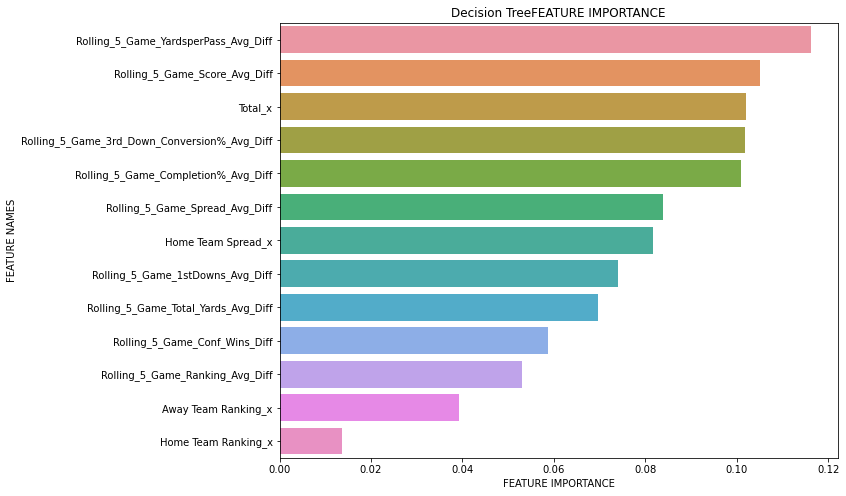

In [91]:
plot_feature_importance(DT.feature_importances_,X_train.columns,'Decision Tree')

In [92]:
from sklearn.tree import plot_tree, export_text

[Text(2232.0, 951.3000000000001, 'Rolling_5_Game_Total_Yards_Avg_Diff <= 73.4\ngini = 0.529\nsamples = 696\nvalue = [339, 21, 336]'),
 Text(1116.0, 679.5, 'Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff <= -0.001\ngini = 0.525\nsamples = 524\nvalue = [273, 15, 236]'),
 Text(558.0, 407.70000000000005, 'Home Team Spread_x <= -16.0\ngini = 0.517\nsamples = 317\nvalue = [148, 6, 163]'),
 Text(279.0, 135.89999999999998, '\n  (...)  \n'),
 Text(837.0, 135.89999999999998, '\n  (...)  \n'),
 Text(1674.0, 407.70000000000005, 'Total_x <= 70.0\ngini = 0.509\nsamples = 207\nvalue = [125, 9, 73]'),
 Text(1395.0, 135.89999999999998, '\n  (...)  \n'),
 Text(1953.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3348.0, 679.5, 'Rolling_5_Game_YardsperPass_Avg_Diff <= 4.76\ngini = 0.514\nsamples = 172\nvalue = [66, 6, 100]'),
 Text(2790.0, 407.70000000000005, 'Total_x <= 60.75\ngini = 0.505\nsamples = 164\nvalue = [59, 6, 99]'),
 Text(2511.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3069.0, 135.899999999

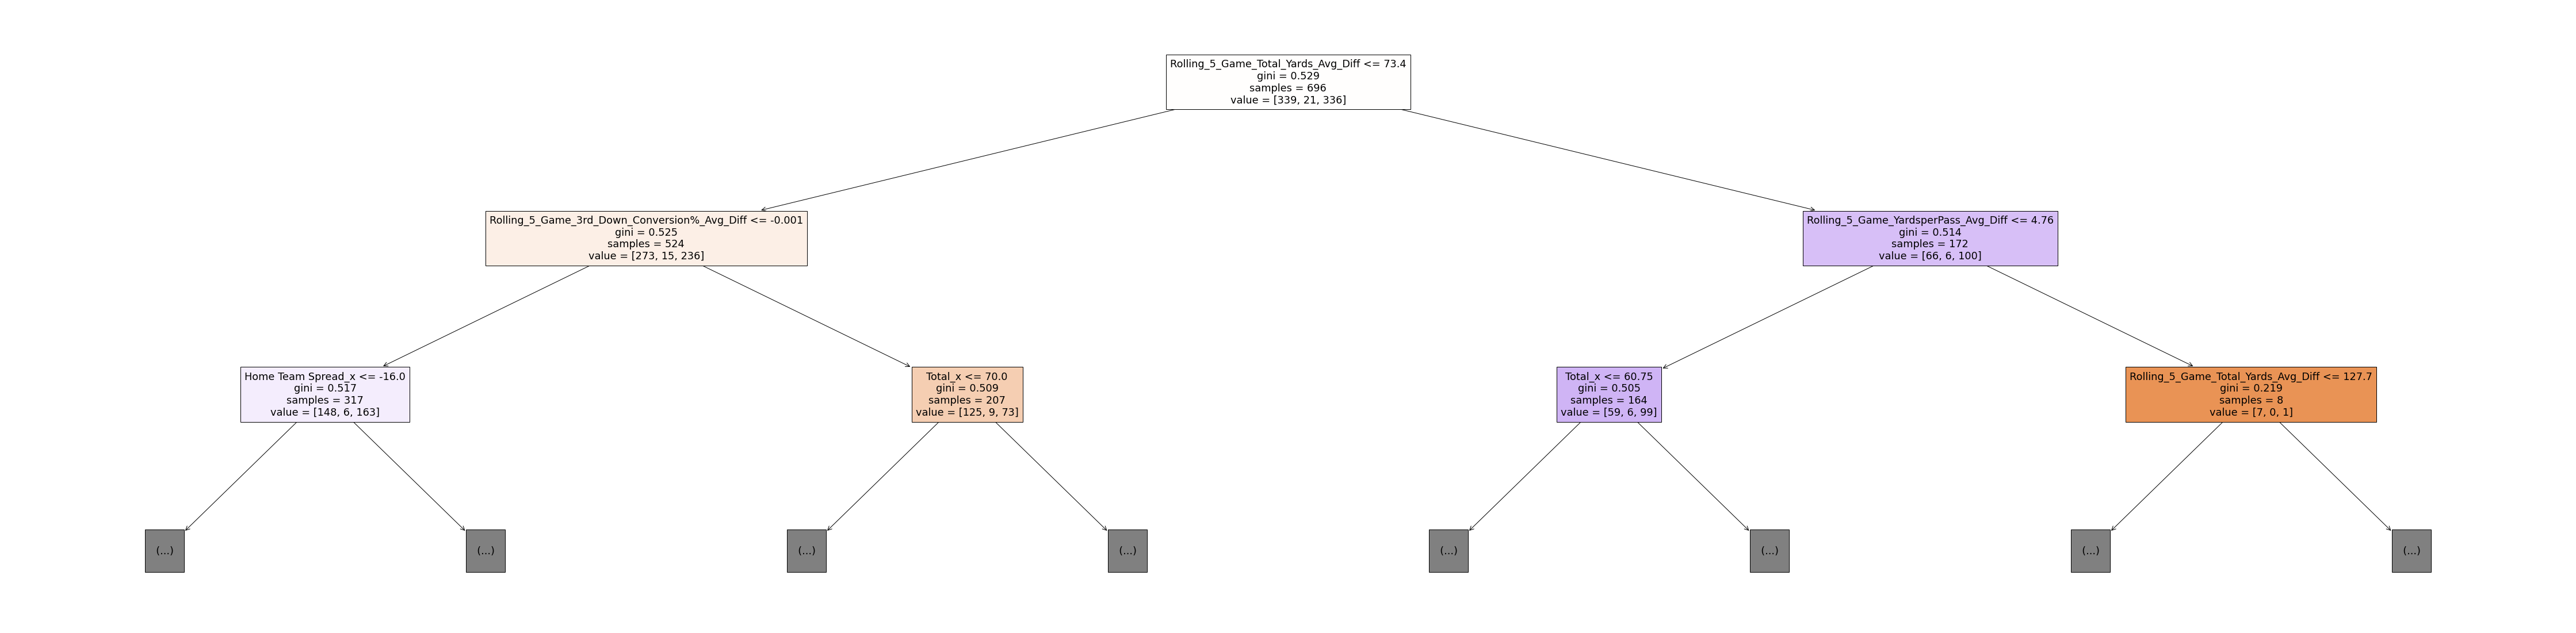

In [93]:
plt.figure(figsize=(80,20))
plot_tree(DT,feature_names=X_train.columns,max_depth=2,filled=True)

# Decision Tree GridSearch

In [94]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,10,15,20,30,40,41,43,45,45,47,50,60],
    'min_samples_leaf':[1,3,5,10],
    'max_features' : [5,6,7,8,9,10,11,12]
}

In [95]:
DT2 = DecisionTreeClassifier()

In [107]:
clf = GridSearchCV(DT2,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, max_features=6,
                                              min_samples_leaf=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 41,
                                       43, 45, 45, 47, 50, 60],
                         'max_features': [5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted')

In [108]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 9,
 'min_samples_leaf': 10,
 'splitter': 'random'}

In [109]:
best_params = clf.best_params_

In [110]:

DT2 = DecisionTreeClassifier(**best_params)


In [111]:
DT2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=9,
                       min_samples_leaf=10, splitter='random')

In [112]:
y_pred = DT2.predict(X_test)

In [113]:
metrics.accuracy_score(y_test, y_pred)

0.5043103448275862

In [114]:
print('Decision Tree2 - Parameter Tuning' '\n', metrics.classification_report(y_test, y_pred, digits=3))

Decision Tree2 - Parameter Tuning
               precision    recall  f1-score   support

  H_Spread_L      0.571     0.333     0.421       120
  H_Spread_P      0.000     0.000     0.000         6
  H_Spread_W      0.475     0.726     0.575       106

    accuracy                          0.504       232
   macro avg      0.349     0.353     0.332       232
weighted avg      0.513     0.504     0.480       232



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(2790.0, 951.3000000000001, 'Total_x <= 72.844\nentropy = 1.165\nsamples = 696\nvalue = [339, 21, 336]'),
 Text(2232.0, 679.5, 'Home Team Spread_x <= -14.409\nentropy = 1.167\nsamples = 686\nvalue = [338, 21, 327]'),
 Text(1116.0, 407.70000000000005, 'Rolling_5_Game_Ranking_Avg_Diff <= 48.015\nentropy = 1.072\nsamples = 131\nvalue = [77, 2, 52]'),
 Text(558.0, 135.89999999999998, '\n  (...)  \n'),
 Text(1674.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3348.0, 407.70000000000005, 'Rolling_5_Game_Completion%_Avg_Diff <= 0.049\nentropy = 1.18\nsamples = 555\nvalue = [261, 19, 275]'),
 Text(2790.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3906.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3348.0, 679.5, 'entropy = 0.469\nsamples = 10\nvalue = [1, 0, 9]')]

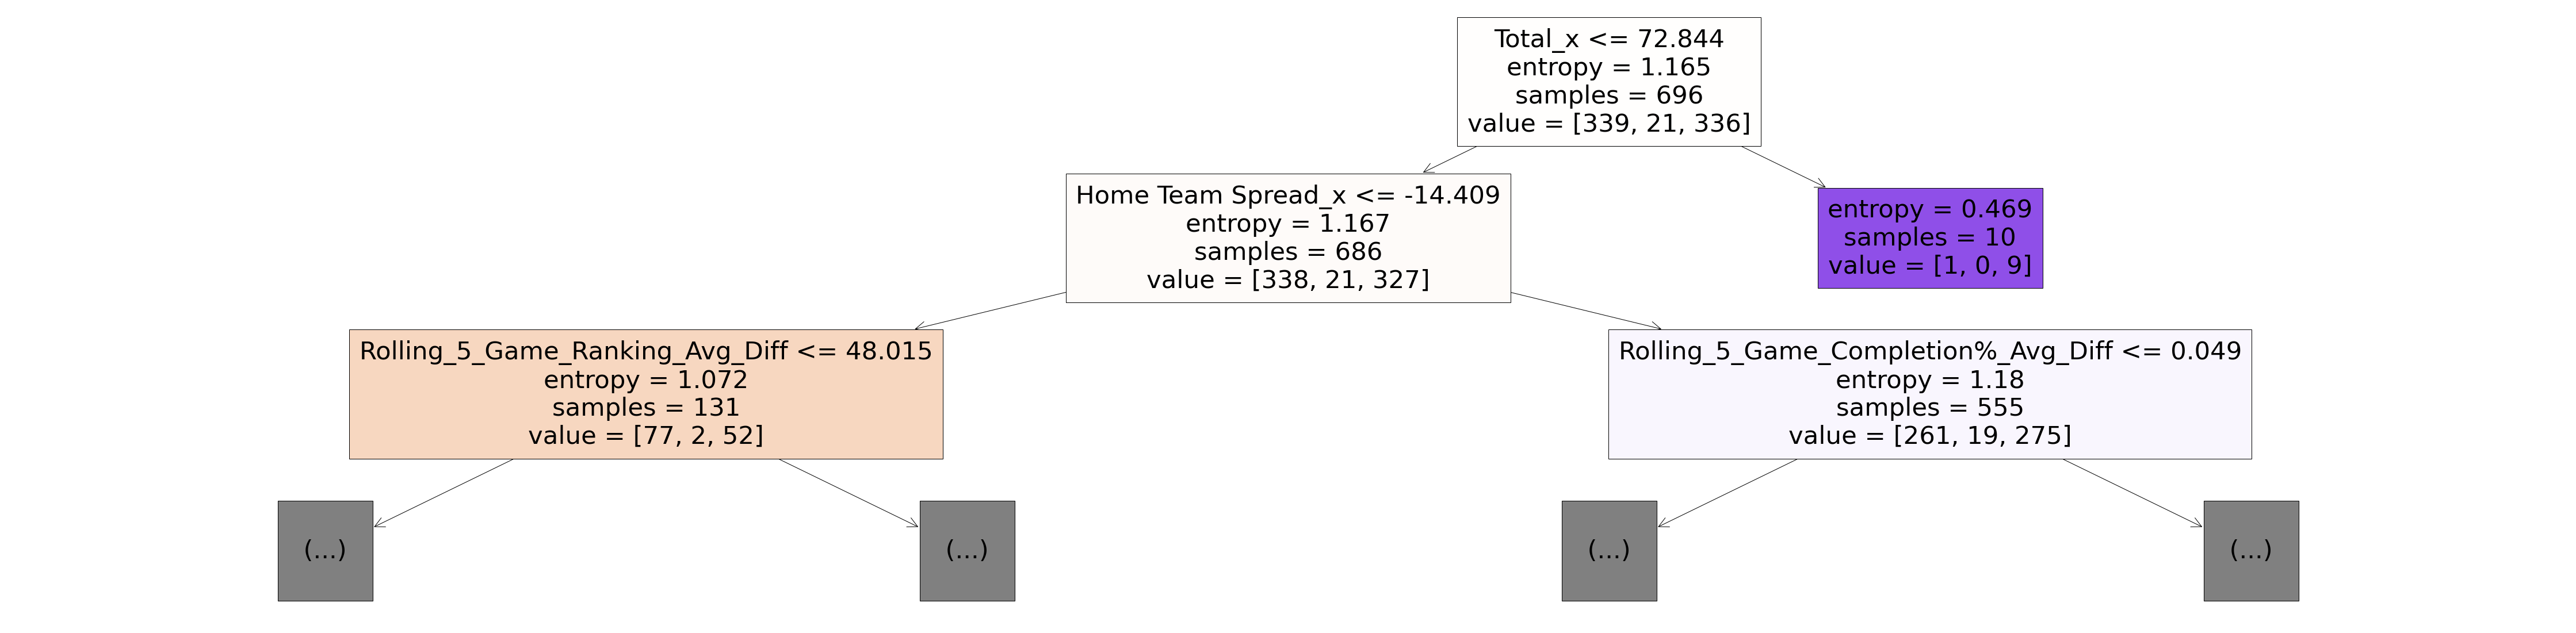

In [115]:
plt.figure(figsize=(80,20))
plot_tree(DT2,feature_names=X_train.columns,max_depth=2,filled=True)

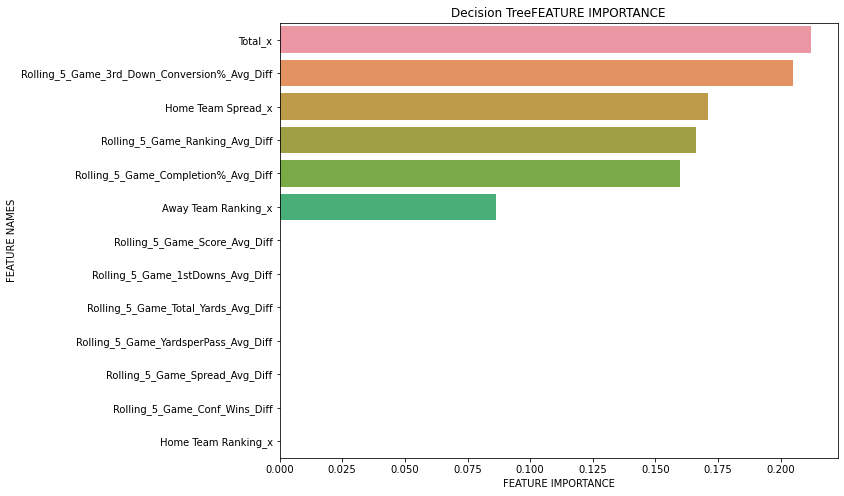

In [116]:
plot_feature_importance(DT2.feature_importances_,X_train.columns,'Decision Tree')

# Random Forrest 

In [117]:
RF = RandomForestClassifier()

In [118]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [119]:
y_pred = RF.predict(X_test)

In [120]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.533     0.533     0.533       120
  H_Spread_P      0.000     0.000     0.000         6
  H_Spread_W      0.482     0.509     0.495       106

    accuracy                          0.509       232
   macro avg      0.338     0.348     0.343       232
weighted avg      0.496     0.509     0.502       232



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest GridSearch

In [121]:
parameters = {
    
    'n_estimators': [50,100,150],
    'criterion': ['entropy','gini'],
    'max_depth': [3,4,5,10,20,30,40,50],
    'max_leaf_nodes': [20,30,50]
    
}

In [122]:
RF = RandomForestClassifier()

In [124]:
clf = GridSearchCV(RF,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 10, 20, 30, 40, 50],
                         'max_leaf_nodes': [20, 30, 50],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_weighted')

In [125]:
best_param= clf.best_params_

In [126]:
best_param

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 30, 'n_estimators': 50}

In [137]:
RF2 = RandomForestClassifier(**best_param)

In [138]:
RF2

RandomForestClassifier(max_depth=5, max_leaf_nodes=30, n_estimators=50)

In [139]:
RF2.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=30, n_estimators=50)

In [140]:
y_pred=RF2.predict(X_test)

In [141]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.527     0.492     0.509       120
  H_Spread_P      0.000     0.000     0.000         6
  H_Spread_W      0.467     0.528     0.496       106

    accuracy                          0.496       232
   macro avg      0.331     0.340     0.335       232
weighted avg      0.486     0.496     0.490       232



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


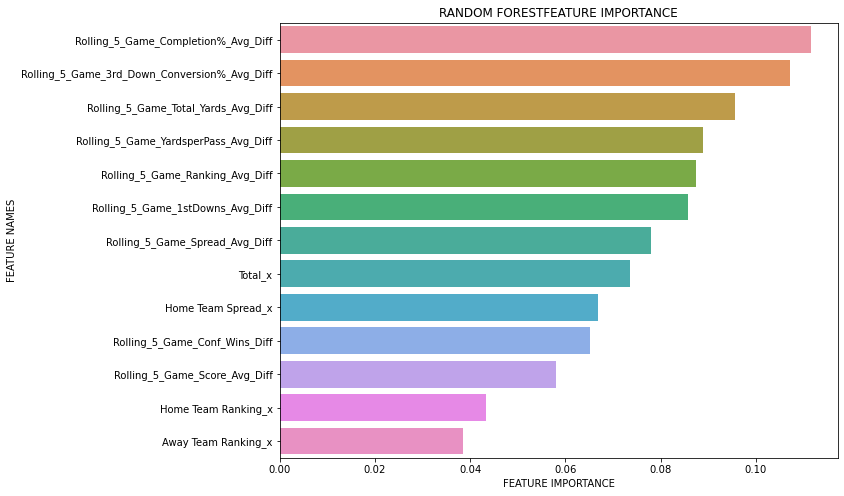

In [142]:
plot_feature_importance(RF2.feature_importances_,X_train.columns,'RANDOM FOREST')

# K NEAREST NEIGHBOR 

In [143]:
KNN = KNeighborsClassifier(n_neighbors=40)

In [144]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [145]:
y_pred= KNN.predict(X_test)

In [146]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.511     0.592     0.548       120
  H_Spread_P      0.000     0.000     0.000         6
  H_Spread_W      0.430     0.377     0.402       106

    accuracy                          0.478       232
   macro avg      0.314     0.323     0.317       232
weighted avg      0.461     0.478     0.467       232



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [212]:
parameters = {
    'n_neighbors' : [5,9,15,21,25,31,35,40,41,45,47,49,51,53,55,57,59,61]
    
}

In [213]:
KNN = KNeighborsClassifier()

In [214]:
clf = GridSearchCV(KNN,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 9, 15, 21, 25, 31, 35, 40, 41, 45,
                                         47, 49, 51, 53, 55, 57, 59, 61]},
             scoring='f1_weighted')

In [215]:
best_param= clf.best_params_

In [216]:
best_param

{'n_neighbors': 51}

In [217]:
KNN2 = KNeighborsClassifier(**best_param)

In [218]:
KNN2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=51)

In [219]:
y_pred=KNN2.predict(X_test)

In [220]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.500     0.525     0.512       120
  H_Spread_P      0.000     0.000     0.000         6
  H_Spread_W      0.425     0.425     0.425       106

    accuracy                          0.466       232
   macro avg      0.308     0.317     0.312       232
weighted avg      0.453     0.466     0.459       232



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machines Model

In [221]:
from sklearn import svm

In [222]:
clf = svm.SVC()

In [223]:
clf.fit(X_train, y_train)

SVC()

In [224]:
y_pred = clf.predict(X_test)


In [225]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.540     0.617     0.576       120
  H_Spread_P      0.000     0.000     0.000         6
  H_Spread_W      0.474     0.425     0.448       106

    accuracy                          0.513       232
   macro avg      0.338     0.347     0.341       232
weighted avg      0.496     0.513     0.502       232



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Home / Away Winner Modeling Prep Using Stats Diff Data

In [226]:
df3.columns

Index(['Date', 'Year', 'Home Team', 'Home Team Ranking_x', 'Away Team',
       'Away Team Ranking_x', 'Home Team Spread_x', 'Away Team Spread_x',
       'Total_x', 'Home Score_x_x',
       ...
       'Rolling 5 Past H&A Push Odds_Away_Team',
       'Rolling 5 Past H&A Push Odds Avg_Away_Team',
       'Rolling 5 Past H&A Push Odds Max_Away_Team',
       'Rolling 5 Past H&A Push Odds Min_Away_Team',
       'Rolling 3 Past H&A Push Odds_Away_Team',
       'Rolling 3 Past H&A Push Oddss Avg_Away_Team',
       'Rolling 3 Past H&A Push OddsMax_Away_Team',
       'Rolling 3 Past H&A Push Odds Min_Away_Team',
       'Previous H&A Push Odds_Away_Team', 'H Spread Outcome'],
      dtype='object', length=1594)

In [227]:
df3.shape

(976, 1594)

In [228]:
df5 = df3[Home_High_Corr_Values]

In [229]:
df5.shape

(976, 40)

In [230]:
df5['Rolling_5_Game_Score_Avg_Diff'] = df5['Rolling 5 Past H&A Score Avg_Away_Team'] - df5['Rolling 5 Past H&A Score Avg_Home_Team']

df5['Rolling_5_Game_1stDowns_Avg_Diff'] = df5['Rolling 5 Past H&A 1st Downs Avg_Away_Team'] - df5['Rolling 5 Past H&A 1st Downs Avg_Home_Team']

df5['Rolling_5_Game_Total_Yards_Avg_Diff'] = df5['Rolling 5 Past H&A Total Yards Avg_Away_Team'] - df5['Rolling 5 Past H&A Total Yards Avg_Home_Team']

df5['Rolling_5_Game_YardsperPass_Avg_Diff'] = df5['Rolling 5 Past H&A Yards per Pass Avg_Away_Team'] - df5['Rolling 5 Past H&A Yards per Pass Avg_Home_Team']

df5['Rolling_5_Game_Spread_Avg_Diff'] = df5['Rolling 5 Past H&A Spread Avg_Away_Team'] - df5['Rolling 5 Past H&A Spread Avg_Home_Team']

df5['Rolling_5_Game_Conf_Wins_Diff'] = df5['Rolling 5 Past H&A Conf T Wins_Away_Team'] - df5['Rolling 5 Past H&A Conf T Wins_Home_Team']

df5['Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff'] = df5['Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team'] - df5['Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team']

df5['Rolling_5_Game_Completion%_Avg_Diff'] = df5['Rolling 5 Past H&A Completion % Avg_Away_Team'] - df5['Rolling 5 Past H&A Completion % Avg_Home_Team']

df5['Rolling_5_Game_Ranking_Avg_Diff'] = df5['Rolling 5 Past H&A Ranking Avg_Away_Team'] - df5['Rolling 5 Past H&A Ranking Avg_Home_Team']



<ipython-input-230-59813a3b8efe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Rolling_5_Game_Score_Avg_Diff'] = df5['Rolling 5 Past H&A Score Avg_Away_Team'] - df5['Rolling 5 Past H&A Score Avg_Home_Team']
<ipython-input-230-59813a3b8efe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Rolling_5_Game_1stDowns_Avg_Diff'] = df5['Rolling 5 Past H&A 1st Downs Avg_Away_Team'] - df5['Rolling 5 Past H&A 1st Downs Avg_Home_Team']
<ipython-input-230-59813a3b8efe>:5: SettingWithCopyWarning: 
A value is

In [231]:
df5.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,...,Year,Rolling_5_Game_Score_Avg_Diff,Rolling_5_Game_1stDowns_Avg_Diff,Rolling_5_Game_Total_Yards_Avg_Diff,Rolling_5_Game_YardsperPass_Avg_Diff,Rolling_5_Game_Spread_Avg_Diff,Rolling_5_Game_Conf_Wins_Diff,Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff,Rolling_5_Game_Completion%_Avg_Diff,Rolling_5_Game_Ranking_Avg_Diff
1,6.5,-6.5,49.0,41.0,37.4,23.6,496.8,9.86,-22.3,-29.0,...,2021,-1.0,-1.4,-58.0,0.24,0.4,5.0,-0.148180,-0.038756,-1.8
2,6.5,-6.5,27.0,27.0,22.8,20.0,358.2,6.18,11.1,2.0,...,2021,9.0,3.4,56.6,0.72,-14.8,5.0,-0.046545,-0.020687,-66.6
3,19.5,-19.5,55.5,22.0,24.6,22.2,399.6,7.70,-1.3,-7.0,...,2021,15.6,2.8,124.0,2.48,-20.8,6.0,0.176925,0.055573,-30.4
4,31.5,-31.5,63.5,21.0,17.6,16.2,313.8,6.28,22.5,16.0,...,2021,13.8,4.2,113.0,3.92,-15.7,12.0,0.123914,0.103985,0.0
5,-14.5,14.5,63.0,34.0,31.2,25.0,456.0,8.08,2.8,-4.5,...,2021,-8.8,-6.4,-90.6,-1.68,6.4,-2.0,-0.082420,-0.038860,81.2


In [232]:
df5.columns

Index(['Home Team Spread_x', 'Away Team Spread_x', 'Total_x', 'Home Score_x_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team', 'Away Score_x_x',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg

In [233]:
df5['H/A Winner'] = df5.apply(lambda x: 'Home' if x['Home Score_x_x'] > x['Away Score_x_x'] 
                              else ('Away' if x['Away Score_x_x'] > x['Home Score_x_x'] 
                              else ""),axis=1)

<ipython-input-233-3053ea2a7317>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['H/A Winner'] = df5.apply(lambda x: 'Home' if x['Home Score_x_x'] > x['Away Score_x_x']


In [234]:
df5.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,...,Rolling_5_Game_Score_Avg_Diff,Rolling_5_Game_1stDowns_Avg_Diff,Rolling_5_Game_Total_Yards_Avg_Diff,Rolling_5_Game_YardsperPass_Avg_Diff,Rolling_5_Game_Spread_Avg_Diff,Rolling_5_Game_Conf_Wins_Diff,Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff,Rolling_5_Game_Completion%_Avg_Diff,Rolling_5_Game_Ranking_Avg_Diff,H/A Winner
1,6.5,-6.5,49.0,41.0,37.4,23.6,496.8,9.86,-22.3,-29.0,...,-1.0,-1.4,-58.0,0.24,0.4,5.0,-0.148180,-0.038756,-1.8,Home
2,6.5,-6.5,27.0,27.0,22.8,20.0,358.2,6.18,11.1,2.0,...,9.0,3.4,56.6,0.72,-14.8,5.0,-0.046545,-0.020687,-66.6,Home
3,19.5,-19.5,55.5,22.0,24.6,22.2,399.6,7.70,-1.3,-7.0,...,15.6,2.8,124.0,2.48,-20.8,6.0,0.176925,0.055573,-30.4,Away
4,31.5,-31.5,63.5,21.0,17.6,16.2,313.8,6.28,22.5,16.0,...,13.8,4.2,113.0,3.92,-15.7,12.0,0.123914,0.103985,0.0,Away
5,-14.5,14.5,63.0,34.0,31.2,25.0,456.0,8.08,2.8,-4.5,...,-8.8,-6.4,-90.6,-1.68,6.4,-2.0,-0.082420,-0.038860,81.2,Home


In [235]:
df6 = df5[[
               'Home Team Spread_x',
               'Total_x',
               'Rolling_5_Game_Score_Avg_Diff',
               'Rolling_5_Game_1stDowns_Avg_Diff',
               'Rolling_5_Game_Total_Yards_Avg_Diff',
               'Rolling_5_Game_YardsperPass_Avg_Diff',
               'Rolling_5_Game_Spread_Avg_Diff',
               'Rolling_5_Game_Conf_Wins_Diff',
               'Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff',
               'Rolling_5_Game_Completion%_Avg_Diff',
               'Rolling_5_Game_Ranking_Avg_Diff',
               'Away Team Ranking_x',
               'Home Team Ranking_x',
               'H/A Winner'
    
]]

In [236]:
df6.head()

,Home Team Spread_x,Total_x,Rolling_5_Game_Score_Avg_Diff,Rolling_5_Game_1stDowns_Avg_Diff,Rolling_5_Game_Total_Yards_Avg_Diff,Rolling_5_Game_YardsperPass_Avg_Diff,Rolling_5_Game_Spread_Avg_Diff,Rolling_5_Game_Conf_Wins_Diff,Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff,Rolling_5_Game_Completion%_Avg_Diff,Rolling_5_Game_Ranking_Avg_Diff,Away Team Ranking_x,Home Team Ranking_x,H/A Winner
1,6.5,49.0,-1.0,-1.4,-58.0,0.24,0.4,5.0,-0.148180,-0.038756,-1.8,1,3,Home
2,6.5,27.0,9.0,3.4,56.6,0.72,-14.8,5.0,-0.046545,-0.020687,-66.6,15,99,Home
3,19.5,55.5,15.6,2.8,124.0,2.48,-20.8,6.0,0.176925,0.055573,-30.4,3,99,Away
4,31.5,63.5,13.8,4.2,113.0,3.92,-15.7,12.0,0.123914,0.103985,0.0,99,99,Away
5,-14.5,63.0,-8.8,-6.4,-90.6,-1.68,6.4,-2.0,-0.082420,-0.038860,81.2,99,25,Home


In [237]:
df6.shape

(976, 14)

In [238]:
df6.isnull().sum()

Home Team Spread_x                               0
Total_x                                          0
Rolling_5_Game_Score_Avg_Diff                   38
Rolling_5_Game_1stDowns_Avg_Diff                48
Rolling_5_Game_Total_Yards_Avg_Diff             48
Rolling_5_Game_YardsperPass_Avg_Diff            48
Rolling_5_Game_Spread_Avg_Diff                  38
Rolling_5_Game_Conf_Wins_Diff                   38
Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff    48
Rolling_5_Game_Completion%_Avg_Diff             48
Rolling_5_Game_Ranking_Avg_Diff                 38
Away Team Ranking_x                              0
Home Team Ranking_x                              0
H/A Winner                                       0
dtype: int64

In [239]:
df6 = df6.dropna()

In [240]:
df6.shape

(928, 14)

In [241]:

y = df6['H/A Winner']
X = df6.drop('H/A Winner',axis=1)

In [242]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

# H/A Winner Modeling

# DT

In [243]:

DT= tree.DecisionTreeClassifier()

DT.fit(X_train,y_train)


y_pred = DT.predict(X_test)


y_pred = pd.Series(y_pred)


In [244]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.691     0.580     0.631       112
        Home      0.659     0.758     0.705       120

    accuracy                          0.672       232
   macro avg      0.675     0.669     0.668       232
weighted avg      0.675     0.672     0.670       232



[Text(2232.0, 951.3000000000001, 'Home Team Spread_x <= -2.75\ngini = 0.493\nsamples = 696\nvalue = [306, 390]'),
 Text(1116.0, 679.5, 'Home Team Spread_x <= -14.75\ngini = 0.301\nsamples = 368\nvalue = [68, 300]'),
 Text(558.0, 407.70000000000005, 'Total_x <= 65.25\ngini = 0.079\nsamples = 121\nvalue = [5, 116]'),
 Text(279.0, 135.89999999999998, '\n  (...)  \n'),
 Text(837.0, 135.89999999999998, '\n  (...)  \n'),
 Text(1674.0, 407.70000000000005, 'Rolling_5_Game_3rd_Down_Conversion%_Avg_Diff <= 0.128\ngini = 0.38\nsamples = 247\nvalue = [63, 184]'),
 Text(1395.0, 135.89999999999998, '\n  (...)  \n'),
 Text(1953.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3348.0, 679.5, 'Home Team Spread_x <= 10.25\ngini = 0.398\nsamples = 328\nvalue = [238, 90]'),
 Text(2790.0, 407.70000000000005, 'Rolling_5_Game_Total_Yards_Avg_Diff <= 48.7\ngini = 0.465\nsamples = 234\nvalue = [148, 86]'),
 Text(2511.0, 135.89999999999998, '\n  (...)  \n'),
 Text(3069.0, 135.89999999999998, '\n  (...)  \n'),
 Te

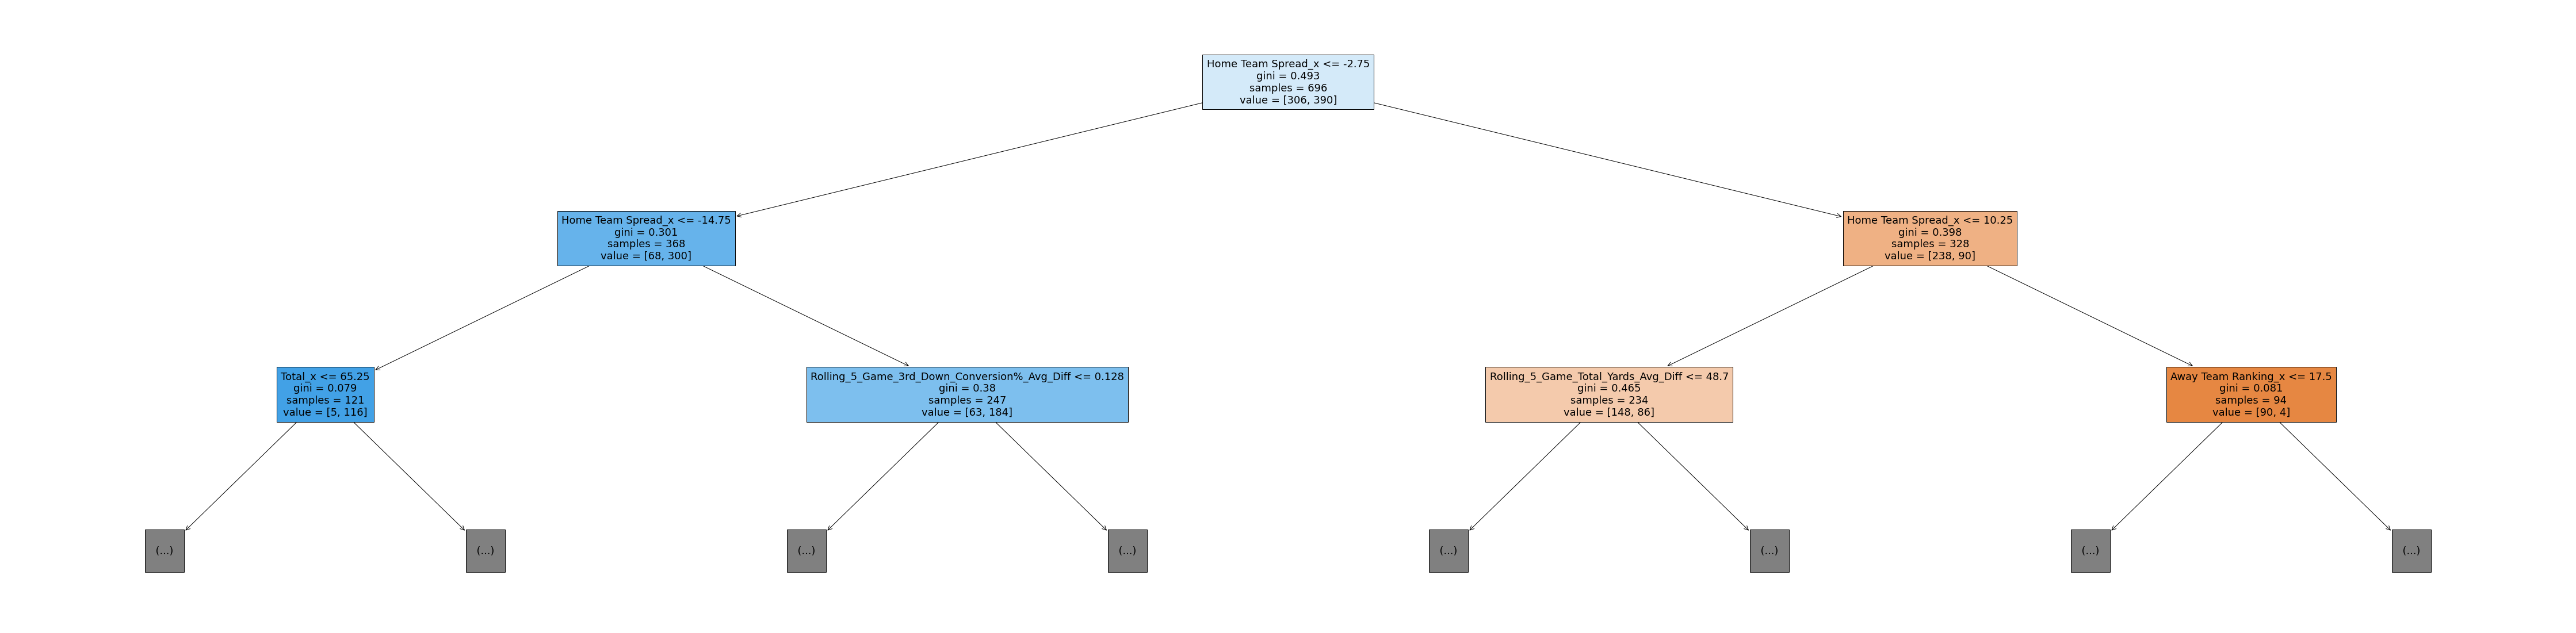

In [247]:
plt.figure(figsize=(80,20))
plot_tree(DT,feature_names=X_train.columns,max_depth=2,filled=True)

# DT Param GridSearch

In [248]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,10,15,20,30,40,41,43,45,45,47,50,60],
    'min_samples_leaf':[1,3,5,10],
    'max_features' : [5,6,7,8,9,10,11,12,13]
}

In [263]:
DT = DecisionTreeClassifier()

In [264]:
clf = GridSearchCV(DT,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 41,
                                       43, 45, 45, 47, 50, 60],
                         'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted')

In [265]:
best_params = clf.best_params_

In [266]:
best_params

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 5,
 'min_samples_leaf': 3,
 'splitter': 'best'}

# DT_Best_Params

In [270]:
DT = DecisionTreeClassifier(**best_params)

In [271]:
DT.fit(X_train,y_train)


y_pred = DT.predict(X_test)


y_pred = pd.Series(y_pred)


print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.698     0.723     0.711       112
        Home      0.733     0.708     0.720       120

    accuracy                          0.716       232
   macro avg      0.716     0.716     0.715       232
weighted avg      0.716     0.716     0.716       232



[Text(2232.0, 906.0, 'Home Team Spread_x <= -2.75\ngini = 0.493\nsamples = 696\nvalue = [306, 390]'),
 Text(1116.0, 543.6, 'Home Team Spread_x <= -14.75\ngini = 0.301\nsamples = 368\nvalue = [68, 300]'),
 Text(558.0, 181.19999999999993, 'gini = 0.079\nsamples = 121\nvalue = [5, 116]'),
 Text(1674.0, 181.19999999999993, 'gini = 0.38\nsamples = 247\nvalue = [63, 184]'),
 Text(3348.0, 543.6, 'Home Team Ranking_x <= 17.5\ngini = 0.398\nsamples = 328\nvalue = [238, 90]'),
 Text(2790.0, 181.19999999999993, 'gini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(3906.0, 181.19999999999993, 'gini = 0.362\nsamples = 278\nvalue = [212, 66]')]

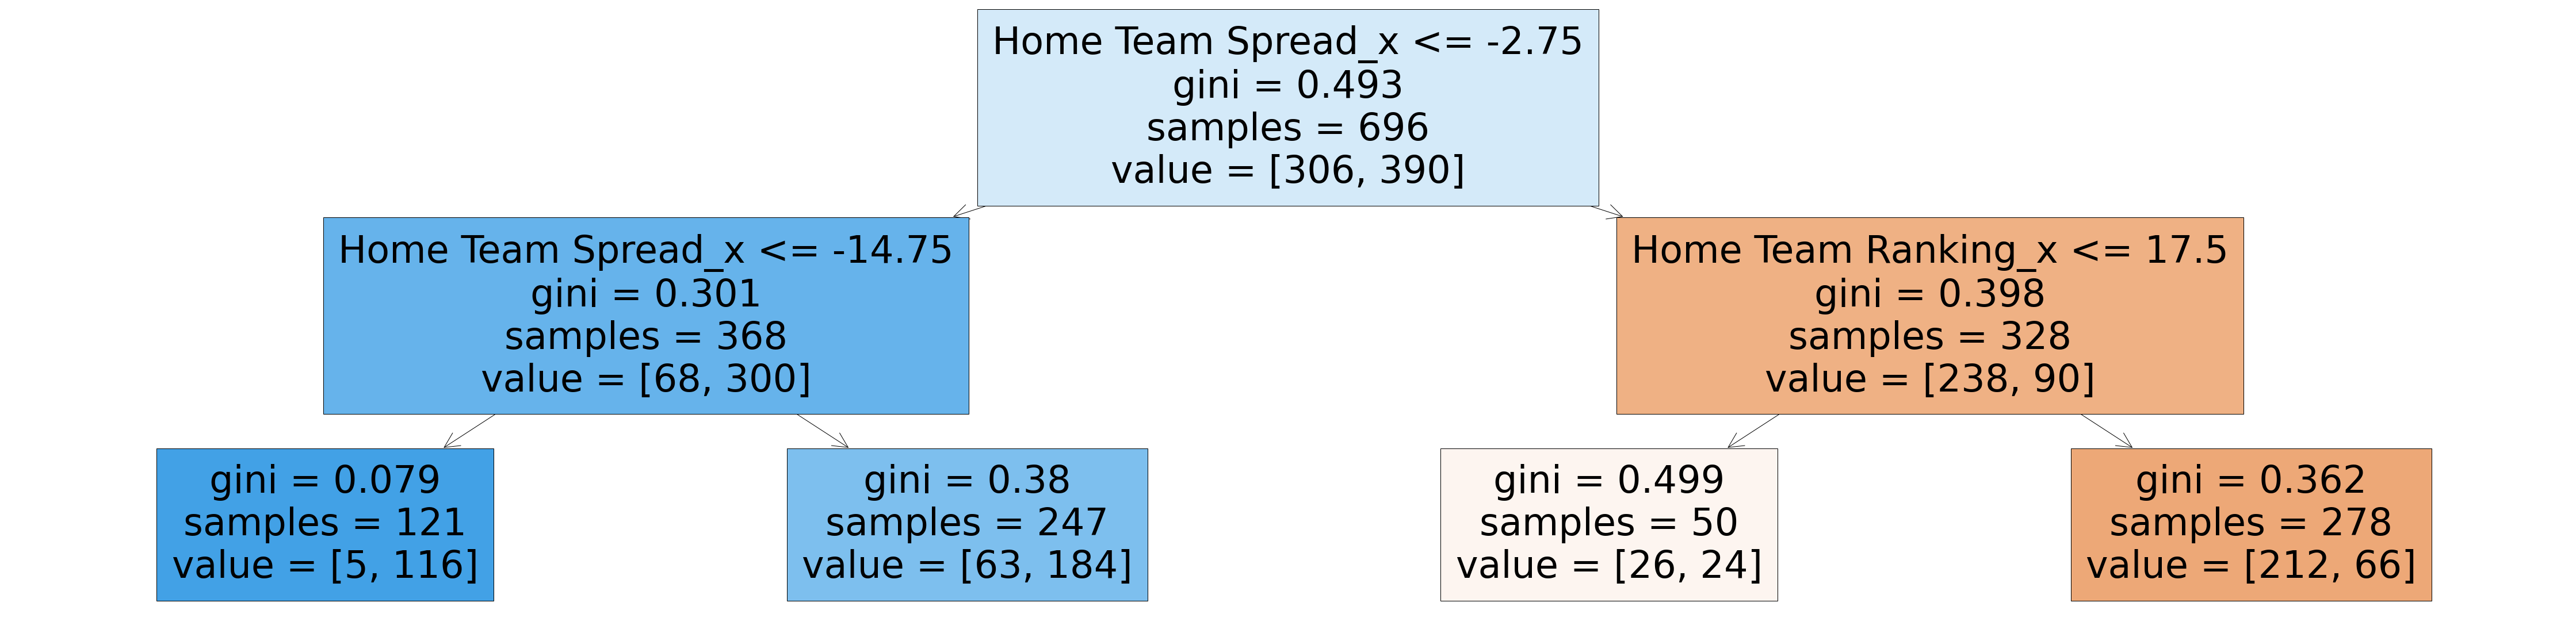

In [272]:
plt.figure(figsize=(80,20))
plot_tree(DT,feature_names=X_train.columns,max_depth=2,filled=True)

# H/A Winner Random Forrest

In [273]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)



y_pred = RF.predict(X_test)
y_pred = pd.Series(y_pred)


In [274]:

print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.716     0.696     0.706       112
        Home      0.724     0.742     0.733       120

    accuracy                          0.720       232
   macro avg      0.720     0.719     0.719       232
weighted avg      0.720     0.720     0.720       232



In [261]:
[estimator.tree_.max_depth for estimator in firstRFModel.estimators_]

[13,
 17,
 15,
 17,
 13,
 15,
 14,
 14,
 12,
 19,
 12,
 15,
 11,
 15,
 16,
 13,
 19,
 21,
 14,
 13,
 14,
 14,
 17,
 17,
 20,
 18,
 17,
 16,
 21,
 15,
 14,
 15,
 17,
 16,
 18,
 15,
 15,
 14,
 14,
 15,
 16,
 19,
 15,
 14,
 13,
 13,
 14,
 15,
 13,
 15,
 12,
 16,
 13,
 14,
 15,
 14,
 16,
 18,
 12,
 17,
 14,
 14,
 14,
 13,
 15,
 16,
 13,
 17,
 14,
 21,
 16,
 17,
 14,
 15,
 13,
 14,
 13,
 16,
 13,
 14,
 16,
 17,
 15,
 14,
 21,
 14,
 11,
 13,
 13,
 18,
 17,
 18,
 15,
 17,
 16,
 15,
 16,
 14,
 14,
 15]

# RF GridSearch

In [278]:
parameters = {
    
    'n_estimators': [50,100,150],
    'criterion': ['entropy','gini'],
    'max_depth': [2,3,4,5,10,15,20],
    'min_samples_split':[3,5,10,15],
    'max_leaf_nodes': [20,30,50]
    
}

In [279]:
RF = RandomForestClassifier()

In [280]:
clf = GridSearchCV(RF,parameters,cv=5,scoring='f1_weighted')
clf.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 10, 15, 20],
                         'max_leaf_nodes': [20, 30, 50],
                         'min_samples_split': [3, 5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_weighted')

In [281]:
best_params = clf.best_params_

In [282]:
best_params

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 30,
 'min_samples_split': 15,
 'n_estimators': 100}

# RF Model 2 - Best Params

In [283]:
RF = RandomForestClassifier(**best_params)

In [284]:
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.728     0.670     0.698       112
        Home      0.713     0.767     0.739       120

    accuracy                          0.720       232
   macro avg      0.721     0.718     0.718       232
weighted avg      0.720     0.720     0.719       232



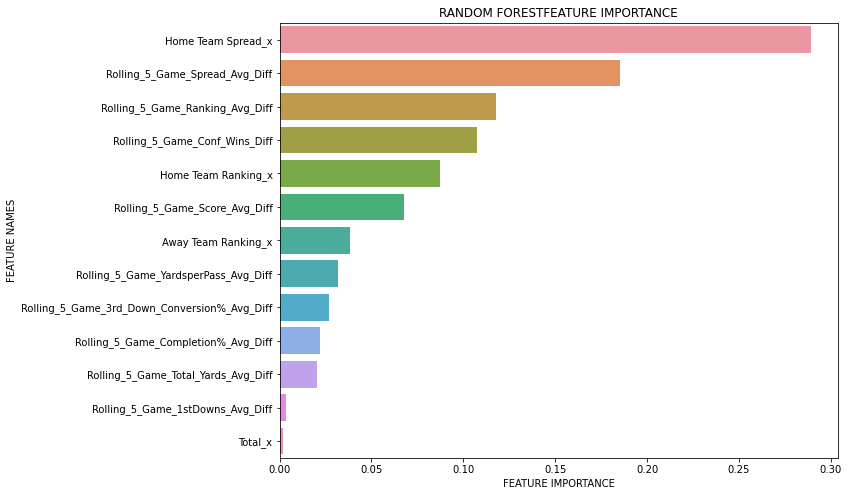

In [286]:
plot_feature_importance(RF.feature_importances_,X_train.columns,'RANDOM FOREST')

# KNN H/A Winer Models

In [287]:
KNN = KNeighborsClassifier(n_neighbors=40)

In [288]:
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.709     0.652     0.679       112
        Home      0.698     0.750     0.723       120

    accuracy                          0.703       232
   macro avg      0.703     0.701     0.701       232
weighted avg      0.703     0.703     0.702       232



# KNN H/A Winner Gridsearch

In [302]:
KNN = KNeighborsClassifier()

In [303]:
parameters = { 'n_neighbors': [20,25,30,35,40,45,50,55,60,65]}

In [304]:
clf = GridSearchCV(KNN,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [20, 25, 30, 35, 40, 45, 50, 55, 60,
                                         65]},
             scoring='f1_weighted')

In [305]:
best_params= clf.best_params_
best_params

{'n_neighbors': 20}

In [306]:
parameters = { 'n_neighbors': [5,9,11,13,15,17,19,20,25,30,35,40,45,50,55,60,65]}

In [307]:
clf = GridSearchCV(KNN,parameters,cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 9, 11, 13, 15, 17, 19, 20, 25, 30,
                                         35, 40, 45, 50, 55, 60, 65]})

In [308]:
best_params= clf.best_params_
best_params

{'n_neighbors': 9}

In [309]:
KNN = KNeighborsClassifier(**best_params)

In [310]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [311]:
y_pred = KNN.predict(X_test)
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.720     0.643     0.679       112
        Home      0.697     0.767     0.730       120

    accuracy                          0.707       232
   macro avg      0.708     0.705     0.705       232
weighted avg      0.708     0.707     0.706       232



In [312]:
test_scores = []
train_scores = []

for i in range(1,50):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


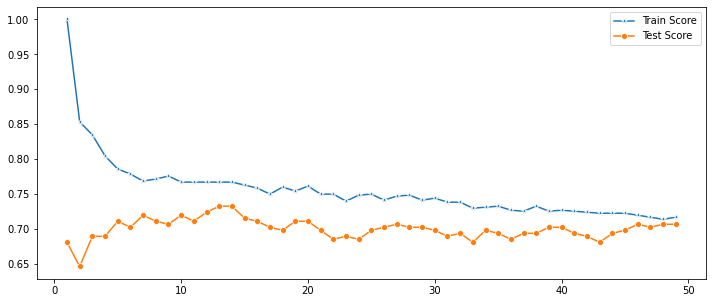

In [313]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,50),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,50),test_scores,marker='o',label='Test Score')

In [314]:
from sklearn.metrics import confusion_matrix

In [315]:
pl = confusion_matrix(y_test,y_pred)

In [316]:
print(pl)

[[72 40]
 [28 92]]


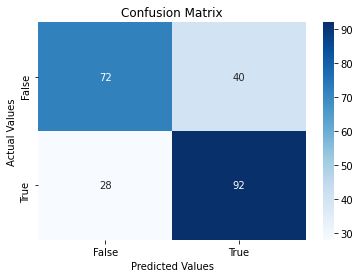

In [317]:
import seaborn as sns

ax = sns.heatmap(pl, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Support Vector Machines

In [318]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.731     0.607     0.663       112
        Home      0.683     0.792     0.734       120

    accuracy                          0.703       232
   macro avg      0.707     0.699     0.699       232
weighted avg      0.706     0.703     0.700       232



# Summary of Findings

Home Spread Predicted Outcome (Win/Lose)

The Random Forest classifier model had the best f1 accuracy score of 50.2%. With even distribution of the actual data for the Home Team Winning & Losing the spread, this model gives a slight advantage to potential bet places as they would win the bet 50.2% of the time. While I would have liked to see this score higher, given the uncertainty of sporting event scores, this model would have to essentially predict both teams scores farily accuratley to determine whether or not the the home team would win or lose the spread - which is not an easy task. 

Home / Away Team Winner (Home/Away)

Random Forest Classifier and Decision Tree Classifier recieved similar f1 accuracy score of around 72% f1 weighted accuracy. Choosing one, I would lean more toward Random Forest given it is a much more complex model and has many indiviudal decision trees with different variations of variables included within each tree and ultimatley takes a majority vote for the predicted outcome. However with Decision Tree being a simpler model and having a achieved a similar score, if time was an issue or if the training dataset were to grow substantially, I would choose DT for my final model selection. 

Final thoughts

While I am happy with these inital results, I realize that this dataset is a relatively small sample of data as it is just focused on SEC teams within the last 20 years. I believe that the results would show significant improvement by introducing much more training data. This could be achieved by including other college conferences, so in theory this dataset could grow at least 10 fold. 

# Repeat of Models Using Team's Indiviudal Stats Variables (as opposed to difference in stats)

In [319]:
df2 = pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Upcoming_Final_Game_df.xlsx')

In [320]:
df2['H Spread Outcome'] = df2.apply(lambda x: 'H_Spread_W' if (x['Home Score_x_x'] + x['Home Team Spread_x']) > x['Away Score_x_x'] 
                                  else ('H_Spread_L' if (x['Home Score_x_x'] + x['Home Team Spread_x']) < x['Away Score_x_x']
                                  else 'H_Spread_P' if x['Home Score_x_x'] + x['Home Team Spread_x'] == x['Away Score_x_x']
                                  else ""
                                       
                                       
                                       
                                       ),axis=1) 

In [321]:
df2= df2[['Home Team Spread_x', 'Away Team Spread_x', 'Total_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
       'Rolling 5 Past H&A Spread Avg_Away_Team',
       'Rolling 5 Past H&A Spread Min_Away_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Away_Team',
       'Rolling 5 Past H&A Conf T Wins_Away_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team',
       'Rolling 5 Past H&A Completion % Avg_Away_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Away_Team',
       'Rolling 5 Past H&A Ranking Avg_Away_Team',
       'Rolling 5 Past H&A Season T Losses_Home_Team', 'Home Team Ranking_x',
       'Away Team Ranking_x', 'Previous H&A Ranking_Home_Team',
       'Previous H&A Ranking_Away_Team','H Spread Outcome']]

In [322]:
df2.shape

(977, 34)

In [323]:
df2= df2.dropna()

In [324]:
df2.shape

(929, 34)

In [325]:
X = df2.drop('H Spread Outcome',axis =1 )

In [326]:
y = df2['H Spread Outcome']

In [327]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [328]:
parameters = {
    'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,30,31,33,35,37,39,40,41,42,43,44,45,46,47,48,49,50]
    
}

In [329]:
KNN = KNeighborsClassifier()

In [330]:
clf = GridSearchCV(KNN,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 30, 31, 33, 35, 37, 39,
                                         40, 41, 42, 43, 44, 45, 46, 47, 48, ...]},
             scoring='f1_weighted')

In [331]:
best_param= clf.best_params_

In [332]:
best_param

{'n_neighbors': 43}

In [333]:
KNN = KNeighborsClassifier(**best_param)

In [334]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=43)

In [335]:
y_pred=KNN.predict(X_test)

In [336]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.489     0.542     0.514       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.400     0.381     0.390       105

    accuracy                          0.451       233
   macro avg      0.296     0.308     0.301       233
weighted avg      0.432     0.451     0.440       233



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [337]:
DT = DecisionTreeClassifier()

In [338]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [339]:
y_pred=DT.predict(X_test)

In [340]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.475     0.467     0.471       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.422     0.438     0.430       105

    accuracy                          0.438       233
   macro avg      0.299     0.302     0.300       233
weighted avg      0.435     0.438     0.436       233



In [341]:
RF = RandomForestClassifier()

In [342]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [343]:
y_pred = RF.predict(X_test)

In [344]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.535     0.508     0.521       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.471     0.533     0.500       105

    accuracy                          0.502       233
   macro avg      0.335     0.347     0.340       233
weighted avg      0.488     0.502     0.494       233



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Home/Away Winner Models

In [449]:
df2 = pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Upcoming_Final_Game_df.xlsx')

In [450]:
df2['H/A Winner'] = df2.apply(lambda x: 'Home' if x['Home Score_x_x'] > x['Away Score_x_x'] 
                              else ('Away' if x['Away Score_x_x'] > x['Home Score_x_x'] 
                              else ""),axis=1)

In [451]:
df2.shape

(977, 1594)

In [452]:
df2 = df2.dropna()

In [453]:
df2.shape

(870, 1594)

In [454]:
df2 = df2[['Home Team Spread_x', 'Away Team Spread_x', 'Total_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Away_Team',
       'Rolling 5 Past H&A Score Avg_Away_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
       'Rolling 5 Past H&A Total Yards Avg_Away_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
       'Rolling 5 Past H&A Spread Avg_Away_Team',
       'Rolling 5 Past H&A Spread Min_Away_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Away_Team',
       'Rolling 5 Past H&A Conf T Wins_Away_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team',
       'Rolling 5 Past H&A Completion % Avg_Away_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Away_Team',
       'Rolling 5 Past H&A Ranking Avg_Away_Team',
       'Rolling 5 Past H&A Season T Losses_Home_Team', 'Home Team Ranking_x',
       'Away Team Ranking_x', 'Previous H&A Ranking_Home_Team',
       'Previous H&A Ranking_Away_Team','H/A Winner'
    
]]

In [455]:
df2.shape

(870, 34)

In [456]:
X = df2.drop('H/A Winner',axis =1 )
y = df2['H/A Winner']

In [457]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

# KNN 

In [458]:
parameters = {
    'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,30,31,33,35,37,39,40,41,42,43,44,45,46,47,48,49,50]
    
}

In [459]:
KNN = KNeighborsClassifier()

In [460]:
clf = GridSearchCV(KNN,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 30, 31, 33, 35, 37, 39,
                                         40, 41, 42, 43, 44, 45, 46, 47, 48, ...]},
             scoring='f1_weighted')

In [461]:
best_param= clf.best_params_

In [462]:
best_param

{'n_neighbors': 17}

In [463]:
KNN = KNeighborsClassifier(**best_param)

In [464]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [465]:
y_pred=KNN.predict(X_test)

In [466]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.633     0.660     0.646        94
        Home      0.733     0.710     0.721       124

    accuracy                          0.688       218
   macro avg      0.683     0.685     0.684       218
weighted avg      0.690     0.688     0.689       218



# Random Forest

In [467]:
RF = RandomForestClassifier()

In [468]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [469]:
y_pred = RF.predict(X_test)

In [470]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.687     0.723     0.705        94
        Home      0.782     0.750     0.765       124

    accuracy                          0.739       218
   macro avg      0.734     0.737     0.735       218
weighted avg      0.741     0.739     0.739       218



In [471]:
parameters = {
    
    'n_estimators': [50,100,150],
    'criterion': ['entropy','gini'],
    'max_depth': [2,3,4,5,10,15,20],
    'min_samples_split':[3,5,10,15],
    'max_leaf_nodes': [20,30,50]
    
}

In [472]:
clf = GridSearchCV(RF,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 10, 15, 20],
                         'max_leaf_nodes': [20, 30, 50],
                         'min_samples_split': [3, 5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_weighted')

In [473]:
best_param= clf.best_params_

In [475]:
best_param

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 30,
 'min_samples_split': 10,
 'n_estimators': 50}

In [474]:
RF = RandomForestClassifier(**best_param)

In [476]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=30,
                       min_samples_split=10, n_estimators=50)

In [477]:
y_pred=RF.predict(X_test)

In [478]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.690     0.734     0.711        94
        Home      0.788     0.750     0.769       124

    accuracy                          0.743       218
   macro avg      0.739     0.742     0.740       218
weighted avg      0.746     0.743     0.744       218



# DT

In [479]:
DT = DecisionTreeClassifier()

In [480]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [481]:
y_pred = DT.predict(X_test)

In [482]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.634     0.681     0.656        94
        Home      0.744     0.702     0.722       124

    accuracy                          0.693       218
   macro avg      0.689     0.691     0.689       218
weighted avg      0.696     0.693     0.694       218



In [483]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,10,15,20,30,40,41,43,45,45,47,50,60],
    'min_samples_leaf':[1,3,5,10],
    'max_features' : [5,6,7,8,9,10,11,12,13]
}

In [484]:
clf = GridSearchCV(DT,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 41,
                                       43, 45, 45, 47, 50, 60],
                         'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted')

In [485]:
best_params = clf.best_params_

In [486]:
best_params

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 10,
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [487]:
DT = DecisionTreeClassifier(**best_params)

In [488]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=10, min_samples_leaf=5)

In [489]:
y_pred = DT.predict(X_test)

In [490]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.645     0.638     0.642        94
        Home      0.728     0.734     0.731       124

    accuracy                          0.693       218
   macro avg      0.687     0.686     0.686       218
weighted avg      0.692     0.693     0.692       218



# Home & Away Stats Models

In [345]:
H_df= df2[['Home Team Spread_x', 'Away Team Spread_x', 'Total_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Home_Team', 'Home Team Ranking_x',
       'Away Team Ranking_x', 'Previous H&A Ranking_Home_Team','H Spread Outcome']]

In [346]:
Away_df = df2[[ 'Home Team Spread_x', 
    'Away Team Spread_x', 
    'Total_x',
    'Rolling 5 Past H&A Season T Losses_Away_Team',
    'Rolling 5 Past H&A Score Avg_Away_Team',
    'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
    'Rolling 5 Past H&A Total Yards Avg_Away_Team',
    'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',
    'Rolling 5 Past H&A Spread Avg_Away_Team',
    'Rolling 5 Past H&A Spread Min_Away_Team',
    'Rolling 5 Past H&A HI REC yrds Avg_Away_Team',
    'Rolling 5 Past H&A Conf T Wins_Away_Team',
    'Rolling 5 Past H&A 3rd Down Conversion % Avg_Away_Team',
    'Rolling 5 Past H&A Completion % Avg_Away_Team',
    'Rolling 5 Past H&A Q1 Score Avg_Away_Team',
    'Rolling 5 Past H&A Ranking Avg_Away_Team',
    'Previous H&A Ranking_Away_Team',
    'H Spread Outcome']]

# H_df Models

# H_df_ KNN

In [347]:
X = H_df.drop('H Spread Outcome',axis =1 )
y = H_df['H Spread Outcome']

In [348]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [349]:
parameters = {
    'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,30,31,33,35,37,39,40,41,42,43,44,45,46,47,48,49,50]
    
}

In [350]:
KNN = KNeighborsClassifier()

In [351]:
clf = GridSearchCV(KNN,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 30, 31, 33, 35, 37, 39,
                                         40, 41, 42, 43, 44, 45, 46, 47, 48, ...]},
             scoring='f1_weighted')

In [352]:
best_param= clf.best_params_

In [353]:
best_param

{'n_neighbors': 40}

In [354]:
KNN = KNeighborsClassifier(**best_param)

In [355]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [356]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [357]:
y_pred=KNN.predict(X_test)

In [358]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.509     0.483     0.496       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.437     0.495     0.464       105

    accuracy                          0.472       233
   macro avg      0.315     0.326     0.320       233
weighted avg      0.459     0.472     0.465       233



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Home_df DT Model

In [359]:
DT=DecisionTreeClassifier()

In [360]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [361]:
y_pred=DT.predict(X_test)

In [362]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.575     0.575     0.575       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.519     0.533     0.526       105

    accuracy                          0.536       233
   macro avg      0.365     0.369     0.367       233
weighted avg      0.530     0.536     0.533       233



In [366]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,10,15,20,30,40,41,43,45,45,47,50,60],
    'max_features' : [5,6,7,8,9,10,11,12,13]
}

In [367]:
clf = GridSearchCV(DT,parameters,cv=5,scoring='f1_weighted')

In [368]:
clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 41,
                                       43, 45, 45, 47, 50, 60],
                         'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted')

In [369]:
best_params = clf.best_params_

In [370]:
DT = DecisionTreeClassifier(**best_params)

In [371]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features=9, splitter='random')

In [372]:
y_pred = DT.predict(X_test)

In [373]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.544     0.667     0.599       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.512     0.419     0.461       105

    accuracy                          0.532       233
   macro avg      0.352     0.362     0.353       233
weighted avg      0.511     0.532     0.516       233



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# H_df RF Model

In [374]:
RF=RandomForestClassifier()

In [375]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [376]:
y_pred = RF.predict(X_test)

In [377]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.566     0.575     0.570       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.505     0.533     0.519       105

    accuracy                          0.536       233
   macro avg      0.357     0.369     0.363       233
weighted avg      0.519     0.536     0.527       233



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


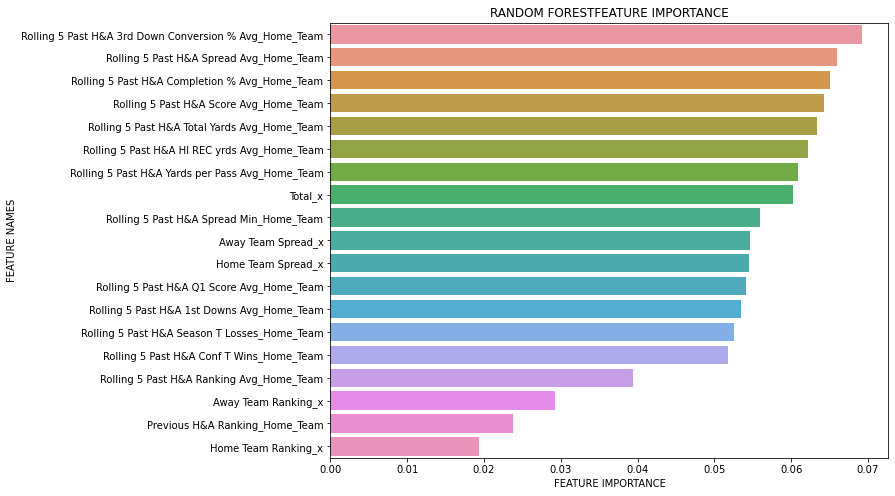

In [378]:
plot_feature_importance(RF.feature_importances_,X_train.columns,'RANDOM FOREST')

In [379]:
[(est.get_depth(), est.tree_.max_depth) for est in RF.estimators_]

[(23, 23),
 (15, 15),
 (18, 18),
 (22, 22),
 (18, 18),
 (18, 18),
 (17, 17),
 (20, 20),
 (17, 17),
 (22, 22),
 (15, 15),
 (27, 27),
 (16, 16),
 (24, 24),
 (21, 21),
 (24, 24),
 (20, 20),
 (21, 21),
 (25, 25),
 (19, 19),
 (16, 16),
 (15, 15),
 (19, 19),
 (20, 20),
 (17, 17),
 (18, 18),
 (17, 17),
 (19, 19),
 (18, 18),
 (14, 14),
 (15, 15),
 (21, 21),
 (20, 20),
 (20, 20),
 (18, 18),
 (21, 21),
 (19, 19),
 (22, 22),
 (19, 19),
 (15, 15),
 (14, 14),
 (25, 25),
 (19, 19),
 (20, 20),
 (20, 20),
 (24, 24),
 (17, 17),
 (22, 22),
 (25, 25),
 (17, 17),
 (16, 16),
 (21, 21),
 (19, 19),
 (24, 24),
 (21, 21),
 (24, 24),
 (19, 19),
 (20, 20),
 (23, 23),
 (17, 17),
 (19, 19),
 (19, 19),
 (16, 16),
 (18, 18),
 (15, 15),
 (20, 20),
 (22, 22),
 (24, 24),
 (22, 22),
 (19, 19),
 (25, 25),
 (20, 20),
 (14, 14),
 (18, 18),
 (17, 17),
 (18, 18),
 (28, 28),
 (21, 21),
 (25, 25),
 (22, 22),
 (22, 22),
 (17, 17),
 (25, 25),
 (19, 19),
 (21, 21),
 (19, 19),
 (20, 20),
 (17, 17),
 (23, 23),
 (19, 19),
 (18, 18),

In [380]:
parameters = {
    
    'n_estimators': [50,100,150],
    'criterion': ['entropy','gini'],
    'max_depth': [3,5,9,15,19,21,23],

    
}

In [385]:
clf = GridSearchCV(RF,parameters,cv=5,scoring='f1_weighted')

In [386]:
y.value_counts()

H_Spread_L    459
H_Spread_W    442
H_Spread_P     27
                1
Name: H Spread Outcome, dtype: int64

In [387]:
459/928

0.49461206896551724

In [388]:
clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 9, 15, 19, 21, 23],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_weighted')

In [389]:
best_params=clf.best_params_

In [390]:
best_params

{'criterion': 'entropy', 'max_depth': 19, 'n_estimators': 50}

In [391]:
RF= RandomForestClassifier(**best_params)

In [392]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=19, n_estimators=50)

In [393]:
y_pred = RF.predict(X_test)

In [394]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.594     0.658     0.625       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.550     0.524     0.537       105

    accuracy                          0.575       233
   macro avg      0.381     0.394     0.387       233
weighted avg      0.554     0.575     0.563       233



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


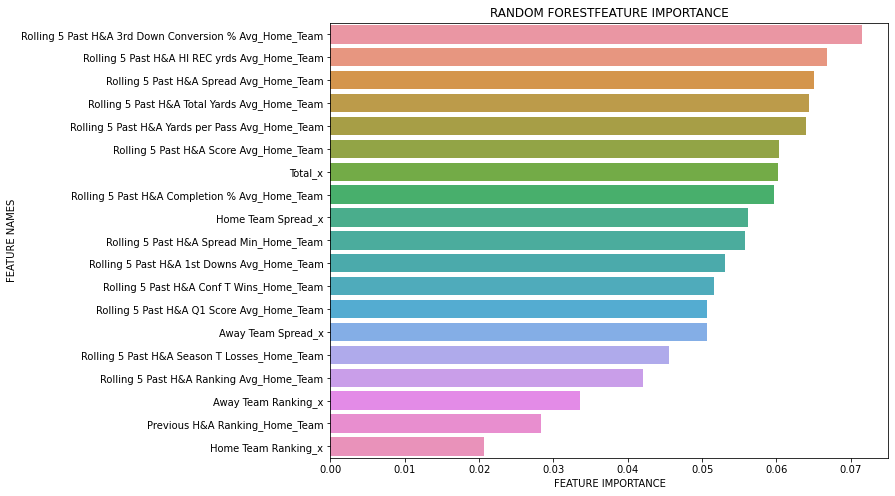

In [395]:
plot_feature_importance(RF.feature_importances_,X_train.columns,'RANDOM FOREST')

In [396]:
X2 = X.drop(['Home Team Spread_x','Away Team Spread_x','Total_x'],axis=1)

In [397]:
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size=.25,random_state=42)

In [398]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=19, n_estimators=50)

In [399]:
y_pred = RF.predict(X_test)

In [400]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.554     0.558     0.556       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.500     0.533     0.516       105

    accuracy                          0.528       233
   macro avg      0.351     0.364     0.357       233
weighted avg      0.510     0.528     0.519       233



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


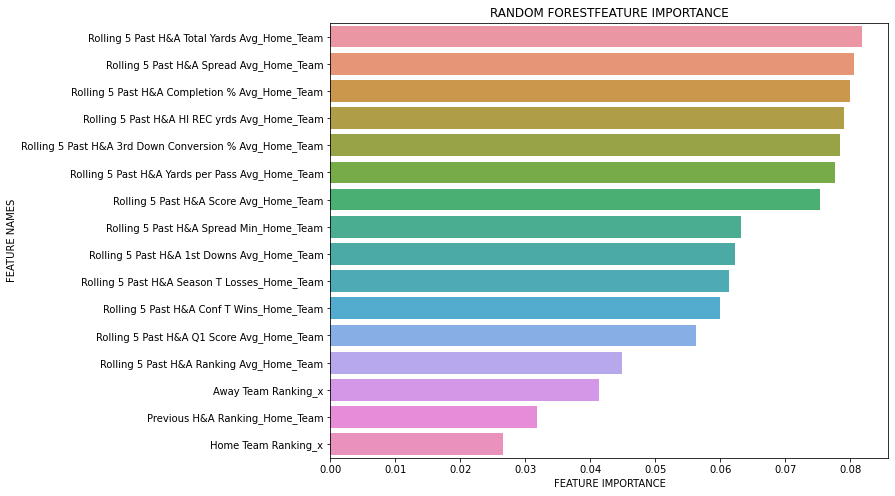

In [401]:
plot_feature_importance(RF.feature_importances_,X_train.columns,'RANDOM FOREST')

In [402]:
X3 = X2.drop(['Home Team Ranking_x','Away Team Ranking_x','Previous H&A Ranking_Home_Team'],axis=1)

In [403]:
X_train,X_test,y_train,y_test = train_test_split(X3,y,test_size=.25,random_state=42)

In [404]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=19, n_estimators=50)

In [405]:
y_pred = RF.predict(X_test)

In [406]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.595     0.625     0.610       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.533     0.543     0.538       105

    accuracy                          0.567       233
   macro avg      0.376     0.389     0.382       233
weighted avg      0.547     0.567     0.556       233



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


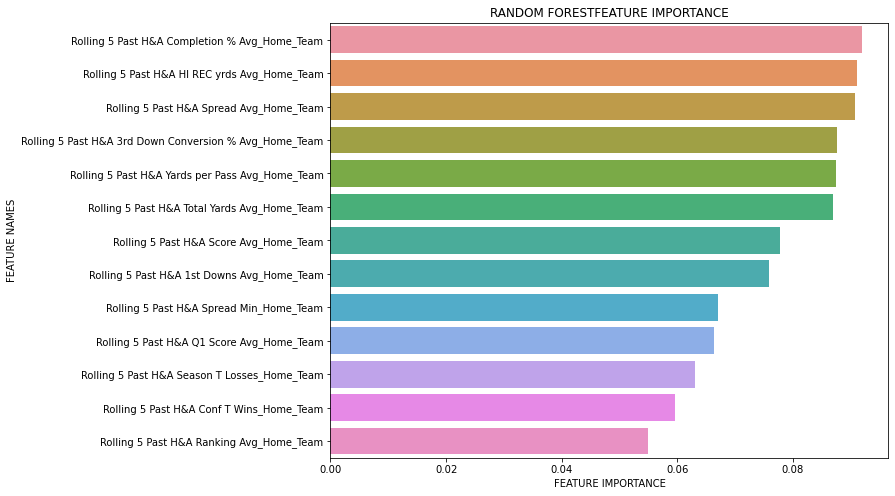

In [407]:
plot_feature_importance(RF.feature_importances_,X_train.columns,'RANDOM FOREST')

In [408]:
X4 = X3.drop(['Rolling 5 Past H&A Ranking Avg_Home_Team','Rolling 5 Past H&A Season T Losses_Home_Team','Rolling 5 Past H&A Conf T Wins_Home_Team','Rolling 5 Past H&A Q1 Score Avg_Home_Team'],axis=1)
       

In [409]:
X_train,X_test,y_train,y_test = train_test_split(X4,y,test_size=.25,random_state=42)

In [410]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=19, n_estimators=50)

In [411]:
y_pred = RF.predict(X_test)

In [412]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.593     0.608     0.601       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.541     0.562     0.551       105

    accuracy                          0.567       233
   macro avg      0.378     0.390     0.384       233
weighted avg      0.550     0.567     0.558       233



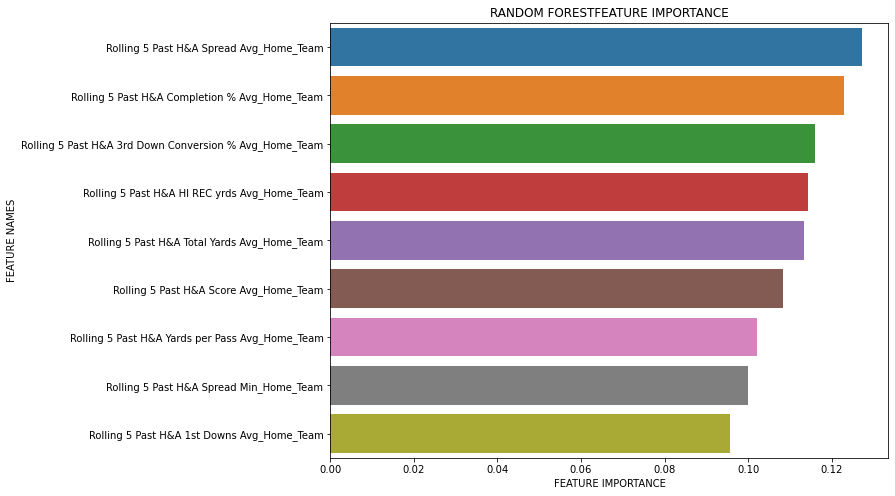

In [413]:
plot_feature_importance(RF.feature_importances_,X_train.columns,'RANDOM FOREST')

In [414]:
X4.columns

Index(['Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team'],
      dtype='object')

In [415]:
X5 = X4.drop('Rolling 5 Past H&A Spread Min_Home_Team',axis=1)

In [416]:
X_train,X_test,y_train,y_test = train_test_split(X5,y,test_size=.25,random_state=42)

In [417]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=19, n_estimators=50)

In [418]:
y_pred = RF.predict(X_test)

In [419]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.535     0.508     0.521       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.471     0.533     0.500       105

    accuracy                          0.502       233
   macro avg      0.335     0.347     0.340       233
weighted avg      0.488     0.502     0.494       233



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [420]:
X6 = X5.drop('Rolling 5 Past H&A Spread Avg_Home_Team',axis=1)

In [421]:
X_train,X_test,y_train,y_test = train_test_split(X5,y,test_size=.25,random_state=42)

In [422]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=19, n_estimators=50)

In [423]:
y_pred = RF.predict(X_test)

In [424]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.562     0.600     0.581       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.500     0.495     0.498       105

    accuracy                          0.532       233
   macro avg      0.354     0.365     0.359       233
weighted avg      0.515     0.532     0.523       233



# Home Stats Home/Away Winner Target Models

In [491]:
df2 = pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Upcoming_Final_Game_df.xlsx')

In [492]:
df2['H/A Winner'] = df2.apply(lambda x: 'Home' if x['Home Score_x_x'] > x['Away Score_x_x'] 
                              else ('Away' if x['Away Score_x_x'] > x['Home Score_x_x'] 
                              else ""),axis=1)

In [493]:
H_df= df2[['Home Team Spread_x', 'Away Team Spread_x', 'Total_x',
       'Rolling 5 Past H&A Score Avg_Home_Team',
       'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
       'Rolling 5 Past H&A Total Yards Avg_Home_Team',
       'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
       'Rolling 5 Past H&A Spread Avg_Home_Team',
       'Rolling 5 Past H&A Spread Min_Home_Team',
       'Rolling 5 Past H&A HI REC yrds Avg_Home_Team',
       'Rolling 5 Past H&A Conf T Wins_Home_Team',
       'Rolling 5 Past H&A 3rd Down Conversion % Avg_Home_Team',
       'Rolling 5 Past H&A Completion % Avg_Home_Team',
       'Rolling 5 Past H&A Q1 Score Avg_Home_Team',
       'Rolling 5 Past H&A Ranking Avg_Home_Team',
       'Rolling 5 Past H&A Season T Losses_Home_Team', 'Home Team Ranking_x',
       'Away Team Ranking_x', 'Previous H&A Ranking_Home_Team','H/A Winner']]

In [494]:
H_df = H_df.dropna()

In [495]:
H_df.shape

(936, 20)

In [496]:
y = H_df['H/A Winner']
X = H_df.drop('H/A Winner',axis=1)

In [497]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

# KNN

In [498]:
parameters = {
    'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,30,31,33,35,37,39,40,41,42,43,44,45,46,47,48,49,50]
    
}

In [501]:
KNN = KNeighborsClassifier()

In [502]:
clf = GridSearchCV(KNN,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 30, 31, 33, 35, 37, 39,
                                         40, 41, 42, 43, 44, 45, 46, 47, 48, ...]},
             scoring='f1_weighted')

In [503]:
best_params= clf.best_params_

In [504]:
best_params

{'n_neighbors': 40}

In [505]:
KNN = KNeighborsClassifier(**best_params)

In [506]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [507]:
y_pred = KNN.predict(X_test)

In [508]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.744     0.571     0.646       112
        Home      0.676     0.820     0.741       122

    accuracy                          0.701       234
   macro avg      0.710     0.696     0.694       234
weighted avg      0.708     0.701     0.696       234



# Decision Tree

In [509]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,10,15,20,30,40,41,43,45,45,47,50,60],
    'max_features' : [5,6,7,8,9,10,11,12,13]
}

In [510]:
DT = DecisionTreeClassifier()

In [511]:
clf = GridSearchCV(DT,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 41,
                                       43, 45, 45, 47, 50, 60],
                         'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted')

In [512]:
best_params = clf.best_params_

In [513]:
best_params

{'criterion': 'gini', 'max_depth': 4, 'max_features': 9, 'splitter': 'random'}

In [514]:
DT = DecisionTreeClassifier(**best_params)

In [515]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=9, splitter='random')

In [516]:
y_pred = DT.predict(X_test)

In [517]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.914     0.571     0.703       112
        Home      0.707     0.951     0.811       122

    accuracy                          0.769       234
   macro avg      0.811     0.761     0.757       234
weighted avg      0.806     0.769     0.760       234



# Random Forest

In [518]:
parameters = {
    
    'n_estimators': [50,100,150],
    'criterion': ['entropy','gini'],
    'max_depth': [3,5,9,15,19,21,23],

    
}

In [519]:
RF = RandomForestClassifier()

In [520]:
clf = GridSearchCV(RF,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 9, 15, 19, 21, 23],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_weighted')

In [521]:
best_params = clf.best_params_

In [522]:
best_params

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 150}

In [523]:
RF = RandomForestClassifier(**best_params)

In [524]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=150)

In [525]:
y_pred = RF.predict(X_test)

In [526]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.826     0.679     0.745       112
        Home      0.746     0.869     0.803       122

    accuracy                          0.778       234
   macro avg      0.786     0.774     0.774       234
weighted avg      0.785     0.778     0.775       234



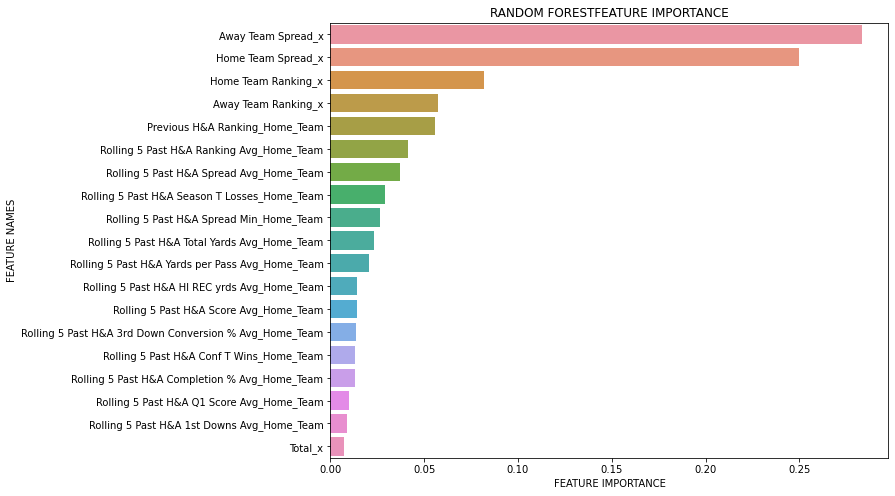

In [527]:
plot_feature_importance(RF.feature_importances_,X_train.columns,'RANDOM FOREST')

In [529]:
X = X.drop(['Away Team Spread_x', 'Home Team Spread_x'],axis=1)

In [530]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [531]:
parameters = {
    
    'n_estimators': [50,100,150],
    'criterion': ['entropy','gini'],
    'max_depth': [3,5,9,15,19,21,23],

    
}

In [532]:
RF = RandomForestClassifier()

In [533]:
clf = GridSearchCV(RF,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 9, 15, 19, 21, 23],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_weighted')

In [534]:
best_params = clf.best_params_

In [535]:
best_params

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100}

In [536]:
RF = RandomForestClassifier(**best_params)

In [537]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [538]:
y_pred = RF.predict(X_test)

In [539]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.761     0.625     0.686       112
        Home      0.704     0.820     0.758       122

    accuracy                          0.726       234
   macro avg      0.733     0.722     0.722       234
weighted avg      0.731     0.726     0.723       234



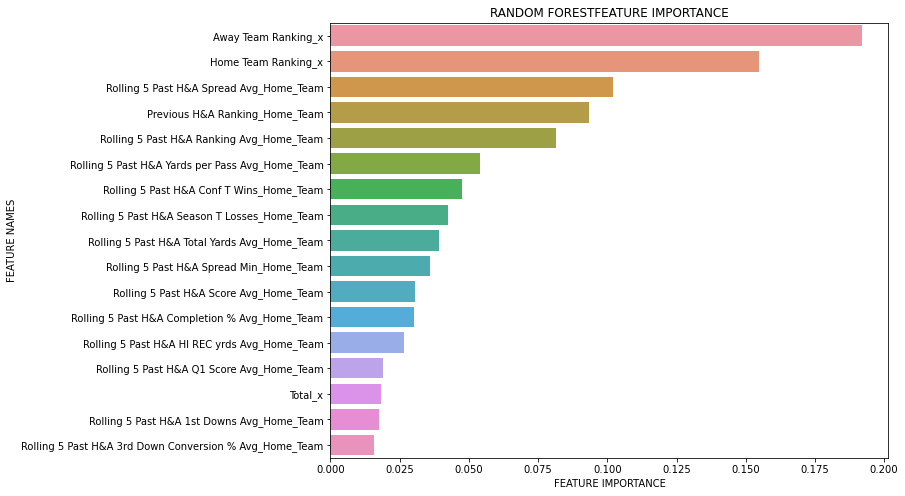

In [540]:
plot_feature_importance(RF.feature_importances_,X_train.columns,'RANDOM FOREST')

In [541]:
X = X.drop(['Away Team Ranking_x','Home Team Ranking_x','Previous H&A Ranking_Home_Team','Rolling 5 Past H&A Ranking Avg_Home_Team'],axis=1)

In [542]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [543]:
parameters = {
    
    'n_estimators': [50,100,150],
    'criterion': ['entropy','gini'],
    'max_depth': [3,5,9,15,19,21,23],

    
}

In [544]:
RF = RandomForestClassifier()

In [545]:
clf = GridSearchCV(RF,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 9, 15, 19, 21, 23],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_weighted')

In [546]:
best_params = clf.best_params_

In [547]:
best_params

{'criterion': 'gini', 'max_depth': 21, 'n_estimators': 50}

In [548]:
RF = RandomForestClassifier(**best_params)

In [549]:
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=21, n_estimators=50)

In [550]:
y_pred = RF.predict(X_test)

In [551]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.611     0.589     0.600       112
        Home      0.635     0.656     0.645       122

    accuracy                          0.624       234
   macro avg      0.623     0.623     0.623       234
weighted avg      0.624     0.624     0.624       234



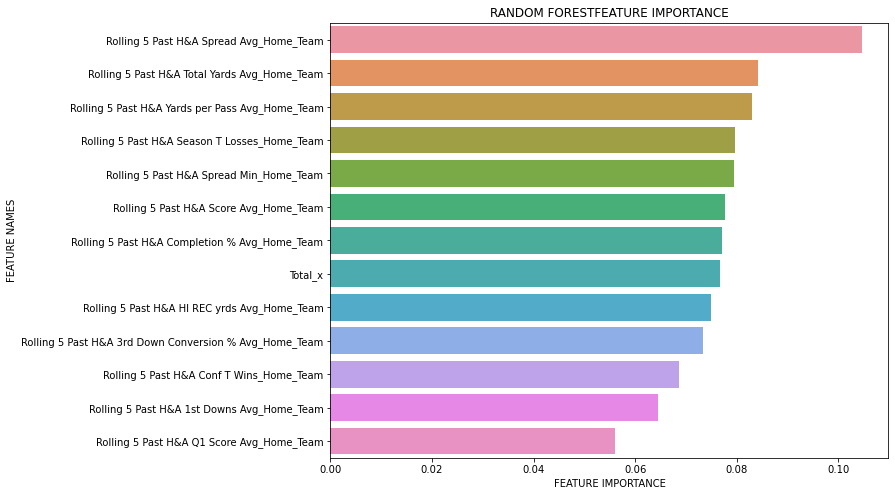

In [552]:
plot_feature_importance(RF.feature_importances_,X_train.columns,'RANDOM FOREST')

In [553]:
X = X.drop(['Rolling 5 Past H&A Spread Avg_Home_Team','Rolling 5 Past H&A Spread Min_Home_Team','Total_x'],axis=1)

In [554]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [555]:
parameters = {
    
    'n_estimators': [50,100,150],
    'criterion': ['entropy','gini'],
    'max_depth': [3,5,9,15,19,21,23],

    
}

In [556]:
RF = RandomForestClassifier()

In [557]:
clf = GridSearchCV(RF,parameters,cv=5,scoring='f1_weighted')
clf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 9, 15, 19, 21, 23],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_weighted')

In [558]:
best_params = clf.best_params_

In [559]:
best_params

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}

In [560]:
RF = RandomForestClassifier(**best_params)

In [561]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9)

In [562]:
y_pred = RF.predict(X_test)

In [563]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        Away      0.649     0.562     0.603       112
        Home      0.642     0.721     0.680       122

    accuracy                          0.645       234
   macro avg      0.646     0.642     0.641       234
weighted avg      0.646     0.645     0.643       234



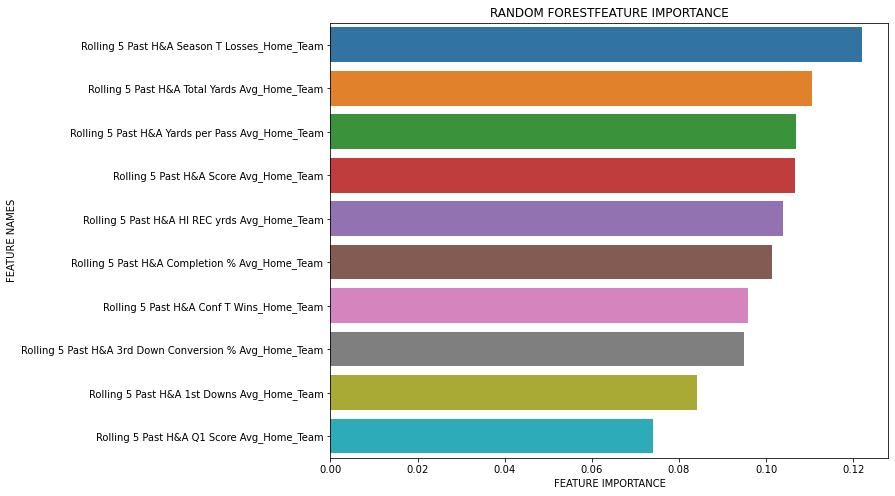

In [564]:
plot_feature_importance(RF.feature_importances_,X_train.columns,'RANDOM FOREST')

# Away_df

In [425]:
X = Away_df.drop('H Spread Outcome',axis =1 )
y = Away_df['H Spread Outcome']

In [426]:
parameters = {
    'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,30,31,33,35,37,39,40,41,42,43,44,45,46,47,48,49,50]
    
}

In [427]:
KNN = KNeighborsClassifier()

In [428]:
clf = GridSearchCV(KNN,parameters,cv=5,scoring='accuracy')
clf.fit(X,y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 30, 31, 33, 35, 37, 39,
                                         40, 41, 42, 43, 44, 45, 46, 47, 48, ...]},
             scoring='accuracy')

In [429]:
best_param= clf.best_params_

In [430]:
best_param

{'n_neighbors': 42}

In [436]:
KNN = KNeighborsClassifier(n_neighbors=42)

In [437]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [438]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=42)

In [439]:
y_pred = KNN.predict(X_test)

In [440]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.500     0.450     0.474       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.448     0.533     0.487       105

    accuracy                          0.472       233
   macro avg      0.316     0.328     0.320       233
weighted avg      0.459     0.472     0.463       233



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [441]:
DT= DecisionTreeClassifier()

In [442]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [443]:
y_pred=DT.predict(X_test)

In [444]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.521     0.525     0.523       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.435     0.448     0.441       105

    accuracy                          0.472       233
   macro avg      0.319     0.324     0.321       233
weighted avg      0.464     0.472     0.468       233



In [445]:
RF=RandomForestClassifier()

In [446]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [447]:
y_pred=RF.predict(X_test)

In [448]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

  H_Spread_L      0.481     0.417     0.446       120
  H_Spread_P      0.000     0.000     0.000         8
  H_Spread_W      0.434     0.533     0.479       105

    accuracy                          0.455       233
   macro avg      0.305     0.317     0.308       233
weighted avg      0.443     0.455     0.446       233



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [570]:
df2 = pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\Upcoming_Final_Game_df.xlsx')

In [571]:
df2['H/A Winner'] = df2.apply(lambda x: 'Home' if x['Home Score_x_x'] > x['Away Score_x_x'] 
                              else ('Away' if x['Away Score_x_x'] > x['Home Score_x_x'] 
                              else ""),axis=1)

In [572]:
df2 = df2.dropna()

In [573]:
df2['Home Team Favorited and Wins'] = df2.apply(lambda x: 1 if x['Home Team Spread_x'] < x['Away Team Spread_x'] and x['Home Score_x_x'] > x['Away Score_x_x'] else (0),axis=1 )
df2['Home Team Favorited and Loses'] = df2.apply(lambda x: 1 if x['Home Team Spread_x'] < x['Away Team Spread_x'] and x['Home Score_x_x'] < x['Away Score_x_x'] else (0),axis=1 )

df2['Away Team Favorited and Wins'] = df2.apply(lambda x: 1 if x['Away Team Spread_x'] < x['Home Team Spread_x'] and x['Away Score_x_x'] > x['Home Score_x_x'] else (0),axis=1 )
df2['Away Team Favorited and Loses'] = df2.apply(lambda x: 1 if x['Away Team Spread_x'] < x['Home Team Spread_x'] and x['Away Score_x_x'] < x['Home Score_x_x'] else (0),axis=1 )



In [574]:
df2.sample(20)

,Date,Year,Home Team,Home Team Ranking_x,Away Team,Away Team Ranking_x,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,...,Rolling 3 Past H&A Push Odds_Away_Team,Rolling 3 Past H&A Push Oddss Avg_Away_Team,Rolling 3 Past H&A Push OddsMax_Away_Team,Rolling 3 Past H&A Push Odds Min_Away_Team,Previous H&A Push Odds_Away_Team,H/A Winner,Home Team Favorited and Wins,Home Team Favorited and Loses,Away Team Favorited and Wins,Away Team Favorited and Loses
495,2013-10-19,2013,Alabama,1,Arkansas,99,-29.5,29.5,48.0,52.0,...,0.0,0.0,0.0,0.0,0.0,Home,1,0,0,0
537,2012-11-03,2012,Georgia,6,Ole Miss,99,-13.5,13.5,61.5,37.0,...,0.0,0.0,0.0,0.0,0.0,Home,1,0,0,0
615,2011-10-08,2011,LSU,1,Florida,17,-14.0,14.0,41.5,41.0,...,0.0,0.0,0.0,0.0,0.0,Home,1,0,0,0
886,2005-11-19,2005,Ole Miss,99,LSU,4,16.5,-16.5,39.5,7.0,...,0.0,0.0,0.0,0.0,0.0,Away,0,0,1,0
263,2017-10-28,2017,Texas A&M,99,Mississippi State,99,3.5,-3.5,57.0,14.0,...,0.0,0.0,0.0,0.0,0.0,Away,0,0,1,0
847,2006-11-04,2006,Tennessee,8,LSU,13,4.0,-4.0,44.0,24.0,...,0.0,0.0,0.0,0.0,0.0,Away,0,0,1,0
316,2016-11-05,2016,LSU,13,Alabama,1,7.0,-7.0,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Away,0,0,1,0
749,2008-11-01,2008,Mississippi State,99,Kentucky,99,1.5,-1.5,38.5,13.0,...,0.0,0.0,0.0,0.0,0.0,Away,0,0,1,0
385,2015-10-17,2015,LSU,6,Florida,8,-6.0,6.0,43.0,35.0,...,0.0,0.0,0.0,0.0,0.0,Home,1,0,0,0
282,2017-10-07,2017,Vanderbilt,99,Georgia,5,17.0,-17.0,41.5,14.0,...,0.0,0.0,0.0,0.0,0.0,Away,0,0,1,0


In [575]:
df2['Home Team Favorited and Wins'].sum()

383

In [576]:
df2['Away Team Favorited and Wins'].sum()

268

In [577]:
383+268

651

In [578]:
df2.shape

(870, 1598)

In [579]:
(383+268)/870

0.7482758620689656